In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages that are to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **BREAST CANCER DETECTION**

Breast cancer is the most common cancer amongest women in the world. It starts when cells in the breast begin to grow abnormally. These cells usually from tumors that can be seen via X-ray or felt as lumps in the breast area.

# **DATA PREPARATION**

**Attribute Information:**

1)ID number 2) Diagnosis (M = malignant, B = benign) 3–32)

**Ten real-valued features are computed for each cell nucleus:**

*   radius (mean of distances from center to points on the perimeter)
*   texture (standard deviation of gray-scale values)
*   perimeter
*   area
*   smoothness (local variation in radius lengths)
*   compactness (perimeter² / area — 1.0)
*   concavity (severity of concave portions of the contour)
*   concave points (number of concave portions of the contour)
*   symmetry
*   fractal dimension (“coastline approximation” — 1)

The **mean, standard error and “worst”** or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

In [ ]:
#Description : This program detects breast cancer,based off of data

In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load the data
data = "/content/drive/MyDrive/breast-cancer.csv"
df=pd.read_csv(data)
print(df)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [ ]:
#To display first five records
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#To display last five records
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


### **Describing the data**

In [ ]:
#describe() method returns description of the data in the DataFrame.
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
#To display number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#To show top 30 rows and bottom 30 rows
df.info

<bound method DataFrame.info of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
#To display number of rows and columns
df.shape

(569, 32)

In [ ]:

#To return data type of each column.
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
#To return the number of unique values for each column
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

In [ ]:
#To count the number of not empty values for each row
df.count()

id                         569
diagnosis                  569
radius_mean                569
texture_mean               569
perimeter_mean             569
area_mean                  569
smoothness_mean            569
compactness_mean           569
concavity_mean             569
concave points_mean        569
symmetry_mean              569
fractal_dimension_mean     569
radius_se                  569
texture_se                 569
perimeter_se               569
area_se                    569
smoothness_se              569
compactness_se             569
concavity_se               569
concave points_se          569
symmetry_se                569
fractal_dimension_se       569
radius_worst               569
texture_worst              569
perimeter_worst            569
area_worst                 569
smoothness_worst           569
compactness_worst          569
concavity_worst            569
concave points_worst       569
symmetry_worst             569
fractal_dimension_worst    569
dtype: i

# **DATA WRANGLING**

It is the process of converting or mapping data from one “**raw**” form into another
format to make it ready for further analysis.**Data pre-processing** is also often called “**data cleaning**” or “**data wrangling**”

In [ ]:
#Count the number of empty values (NaN,NAN,na) in each column
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
#Dropping unnecessary column
df.drop("id",axis=1,inplace=True)

In [ ]:
#Checking whether the column has been removed or not
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#Checking number of rows and columns again
df.shape

(569, 31)

# **EXPLORATORY DATA ANALYSIS**

### **Classification of patients into malignant(cancerous) or benign(non cancerous) groups and checking size**

In [ ]:
#To count the number of malignant(M) or benign(B) cells
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
#Another method
df.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

In [ ]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

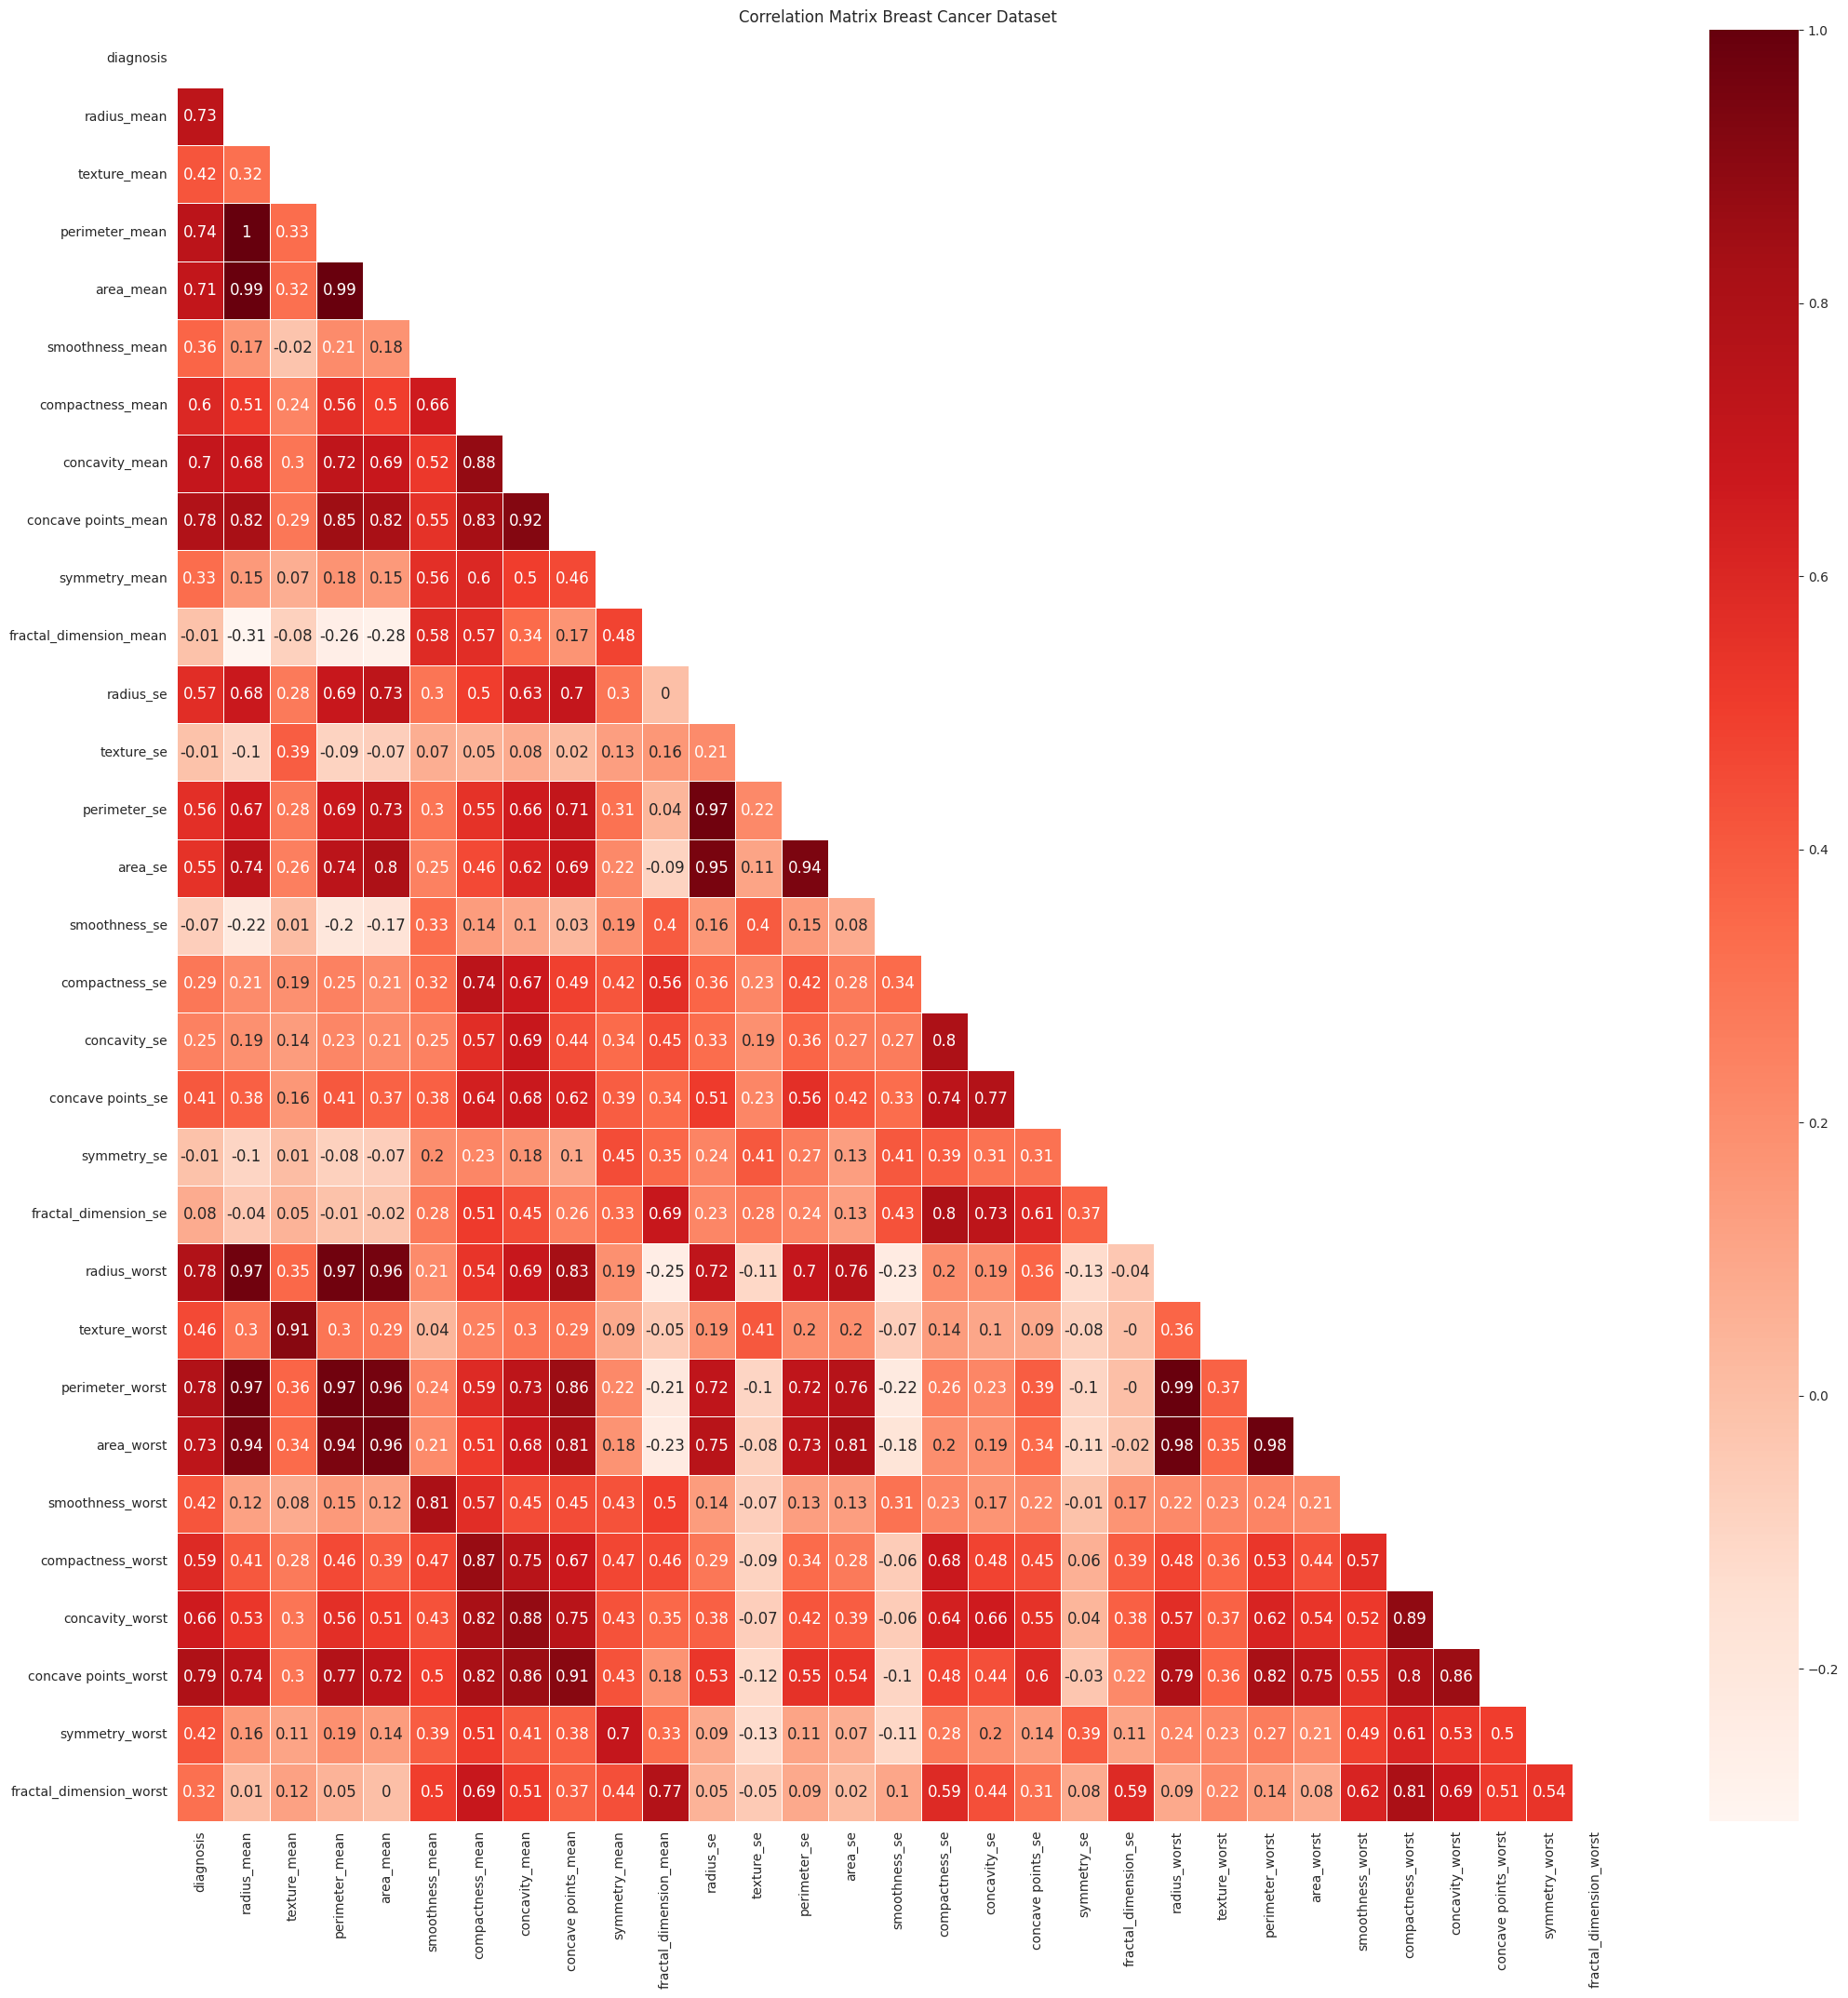

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

table = df
table["diagnosis"] = table.diagnosis.map({"M": 1.0, "B": 0.0})
table = table.corr()

with sns.axes_style("white"):
    mask = np.zeros_like(table)
    mask[np.triu_indices_from(mask)] = True
    plt.figure(figsize=(25, 25))
    sns.heatmap(
        round(table, 2),
        cmap="Reds",
        mask=mask,
        vmax=table.max().max(),
        vmin=table.min().min(),
        linewidths=0.5,
        annot=True,
        annot_kws={"size": 12},
    ).set_title("Correlation Matrix Breast Cancer Dataset")

In [ ]:
sns.pairplot(df, hue='diagnosis', vars=['radius_mean',
'texture_mean',
'perimeter_mean',
'area_mean',
'smoothness_mean',
'compactness_mean',
'concavity_mean',
'concave points_mean',
'symmetry_mean',
'fractal_dimension_mean'])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df['smoothness_worst'].value_counts()

0.13470    4
0.12750    4
0.12230    4
0.14010    4
0.12340    4
          ..
0.22260    1
0.13810    1
0.14290    1
0.13220    1
0.08996    1
Name: smoothness_worst, Length: 411, dtype: int64

In [ ]:
import plotly.express as px

aux = table[["diagnosis"]].sort_values("diagnosis", ascending=False)
aux["columns"] = table.index
fig = px.bar(
    aux,
    x="columns",
    y="diagnosis",
    hover_data=["columns", "diagnosis"],
    color="diagnosis",
    height=600,
)
fig.show()

In [ ]:
import plotly.express as px


def plot_violin(columns, name):
    final = []
    for col in columns:
        aux = df[["diagnosis", col]]
        aux["type"] = col
        aux.columns = ["diagnosis", f"{name} values", "type"]
        final.append(aux)

    data = pd.concat(final)
    fig = px.violin(
        data,
        y=f"{name} values",
        x="type",
        color="diagnosis",
        box=True,
        points="all",
        hover_data=data.columns,
    )
    fig.update_layout(
        title_text=f"Values of {name} by the target (B,M)",
        xaxis_title="Diagnosis (0 = B = benign, 1 = M = malignant)",
    )
    fig.show()

In [ ]:
col = "radius"
plot_violin([f"{col}_mean", f"{col}_se", f"{col}_worst"], col)

<ipython-input-27-c448f9a8edc8>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-c448f9a8edc8>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-c448f9a8edc8>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
col = "texture"
plot_violin([f"{col}_mean", f"{col}_se", f"{col}_worst"], col)

<ipython-input-27-c448f9a8edc8>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-c448f9a8edc8>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-c448f9a8edc8>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
col = "perimeter"
plot_violin([f"{col}_mean", f"{col}_se", f"{col}_worst"], col)

<ipython-input-27-c448f9a8edc8>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-c448f9a8edc8>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-c448f9a8edc8>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
col = "area"
plot_violin([f"{col}_mean", f"{col}_se", f"{col}_worst"], col)

<ipython-input-27-c448f9a8edc8>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-c448f9a8edc8>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-c448f9a8edc8>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
col = "smoothness"
plot_violin([f"{col}_mean", f"{col}_se", f"{col}_worst"], col)

<ipython-input-27-c448f9a8edc8>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-c448f9a8edc8>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-c448f9a8edc8>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
col = "compactness"
plot_violin([f"{col}_mean", f"{col}_se", f"{col}_worst"], col)

<ipython-input-27-c448f9a8edc8>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-c448f9a8edc8>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-c448f9a8edc8>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
col = "concavity"
plot_violin([f"{col}_mean", f"{col}_se", f"{col}_worst"], col)

<ipython-input-27-c448f9a8edc8>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-c448f9a8edc8>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-c448f9a8edc8>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
col = "symmetry"
plot_violin([f"{col}_mean", f"{col}_se", f"{col}_worst"], col)

<ipython-input-27-c448f9a8edc8>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-c448f9a8edc8>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-c448f9a8edc8>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### **Visualizing the data**

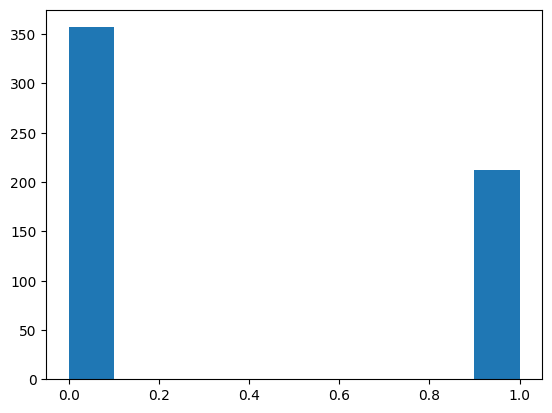

In [ ]:
#Visualization of data using matplotlib.pyplot library
import matplotlib.pyplot as plt
#Visualizing diagnosis using histogram
plt.hist(df['diagnosis'])
plt.show()

In [ ]:
#Getting all values of column diagnosis
df["diagnosis"].values

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0.

In [ ]:
#Putting the count of individual values in a list
data=['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B']
List=[]
Mcount=0
Bcount=0
for x in data:
    if x=='M':
        Mcount=Mcount+1
    else:
        Bcount=Bcount+1
List.append(Mcount)
List.append(Bcount)
List

[212, 357]

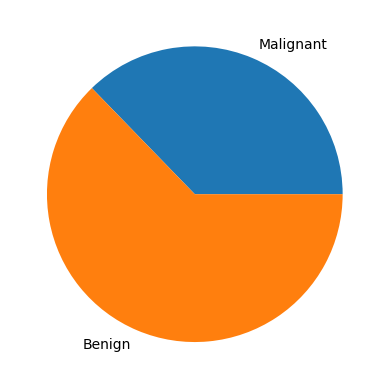

In [ ]:
#Visualizing it using piechart
plt.pie(List,labels=["Malignant","Benign"])
plt.show()

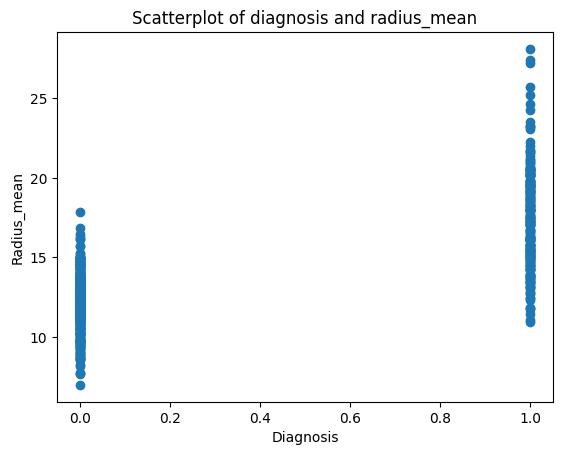

In [ ]:
#Seeing relationship between radius_mean and diagnosis using scatter plot
import matplotlib.pyplot as plt
x=df['diagnosis']
y=df['radius_mean']
plt.scatter(x,y)
plt.title("Scatterplot of diagnosis and radius_mean")
plt.xlabel("Diagnosis")
plt.ylabel("Radius_mean")
plt.show()

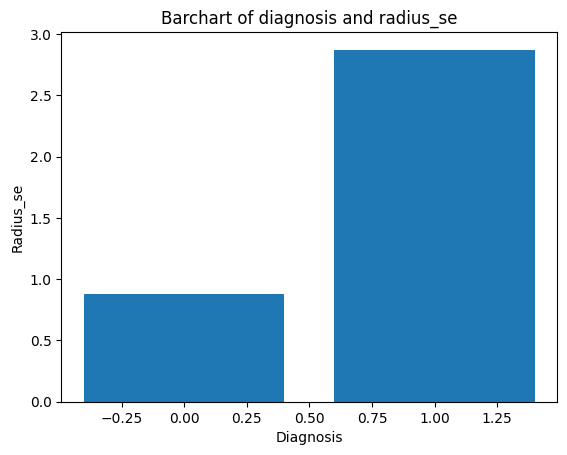

In [ ]:
#Seeing relationship between radius_se and diagnosis piechart
x=df["diagnosis"]
y=df["radius_se"]
plt.bar(x,y)
plt.title("Barchart of diagnosis and radius_se")
plt.xlabel("Diagnosis")
plt.ylabel("Radius_se")
plt.show()

<Axes: >

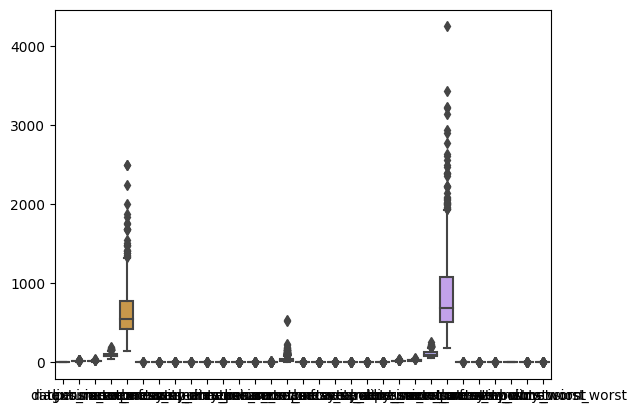

In [ ]:
#Visualizing data using boxplot
sns.boxplot(data=df)
#Here we got boxplot of all the columns on a one go,but its not that much clear

<Axes: >

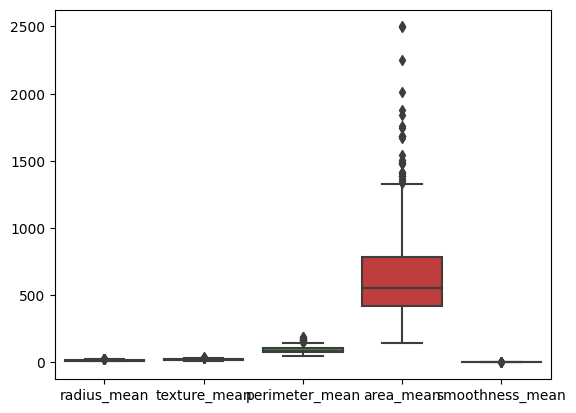

In [ ]:
#We will divide different columns for a boxplot which will make it easier to understand
sns.boxplot(data=df.iloc[:,1:6])

<Axes: >

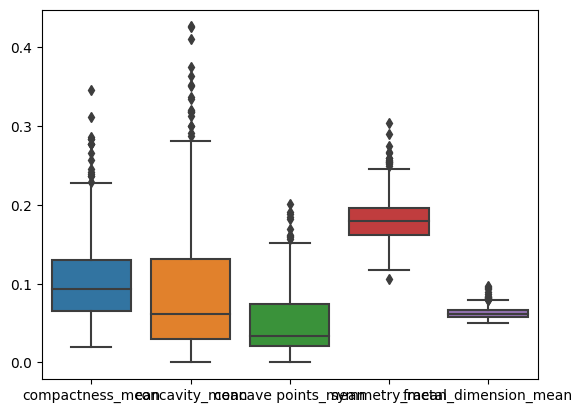

In [ ]:
sns.boxplot(data=df.iloc[:,6:11])

<Axes: >

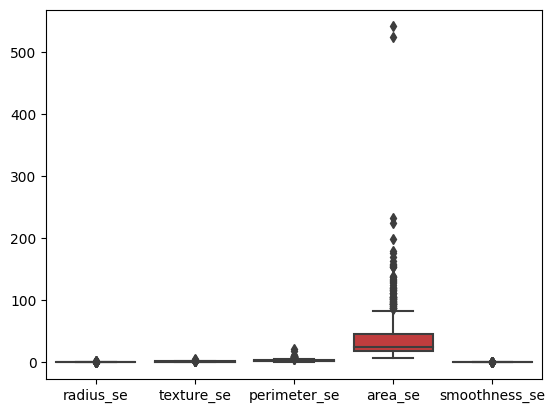

In [ ]:
sns.boxplot(data=df.iloc[:,11:16])

<Axes: >

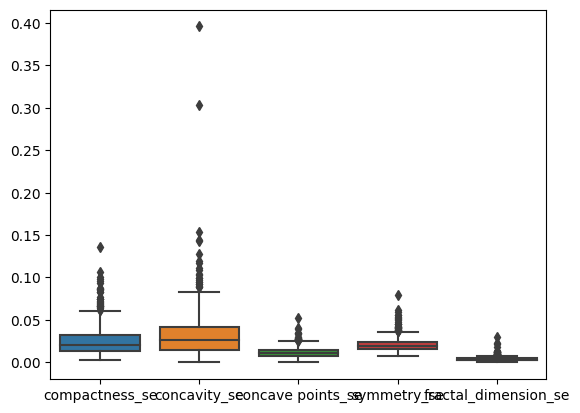

In [ ]:
sns.boxplot(data=df.iloc[:,16:21])

<Axes: >

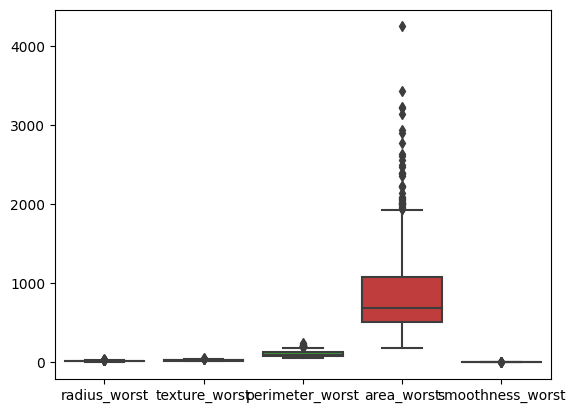

In [ ]:
sns.boxplot(data=df.iloc[:,21:26])

<Axes: >

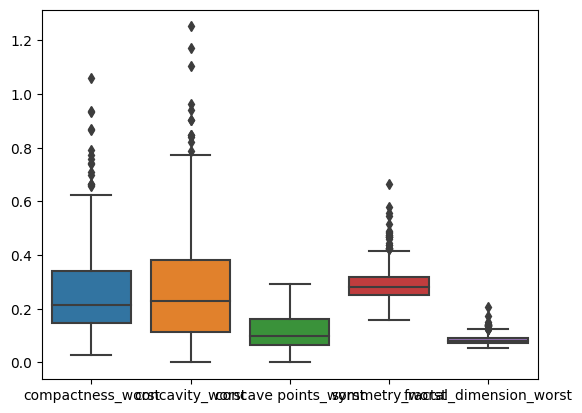

In [ ]:
sns.boxplot(data=df.iloc[:,26:31])

### **Encoding categorical data values**

In [ ]:
#To display the values of column diagnosis
df.iloc[:,0].values

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0.

In [ ]:
#Encoding using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df.iloc[:,0]=label_encoder.fit_transform(df.iloc[:,0].values)
df.iloc[:,0].values

<ipython-input-34-f32395ff893b>:4: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [ ]:
#Now checking data type of column diagnosis
df['diagnosis'].dtype

dtype('int64')

In [ ]:
#To display first 5 rows of new data
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: xlabel='diagnosis', ylabel='radius_mean'>

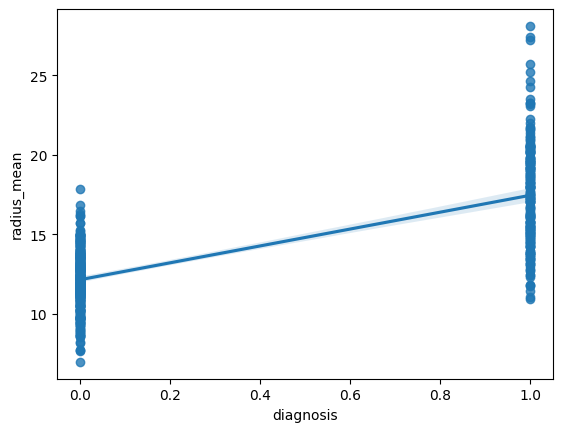

In [ ]:
#Seeing relationship between radius_mean and diagnosis using regression plot
sns.regplot(x='diagnosis',y='radius_mean',data=df)

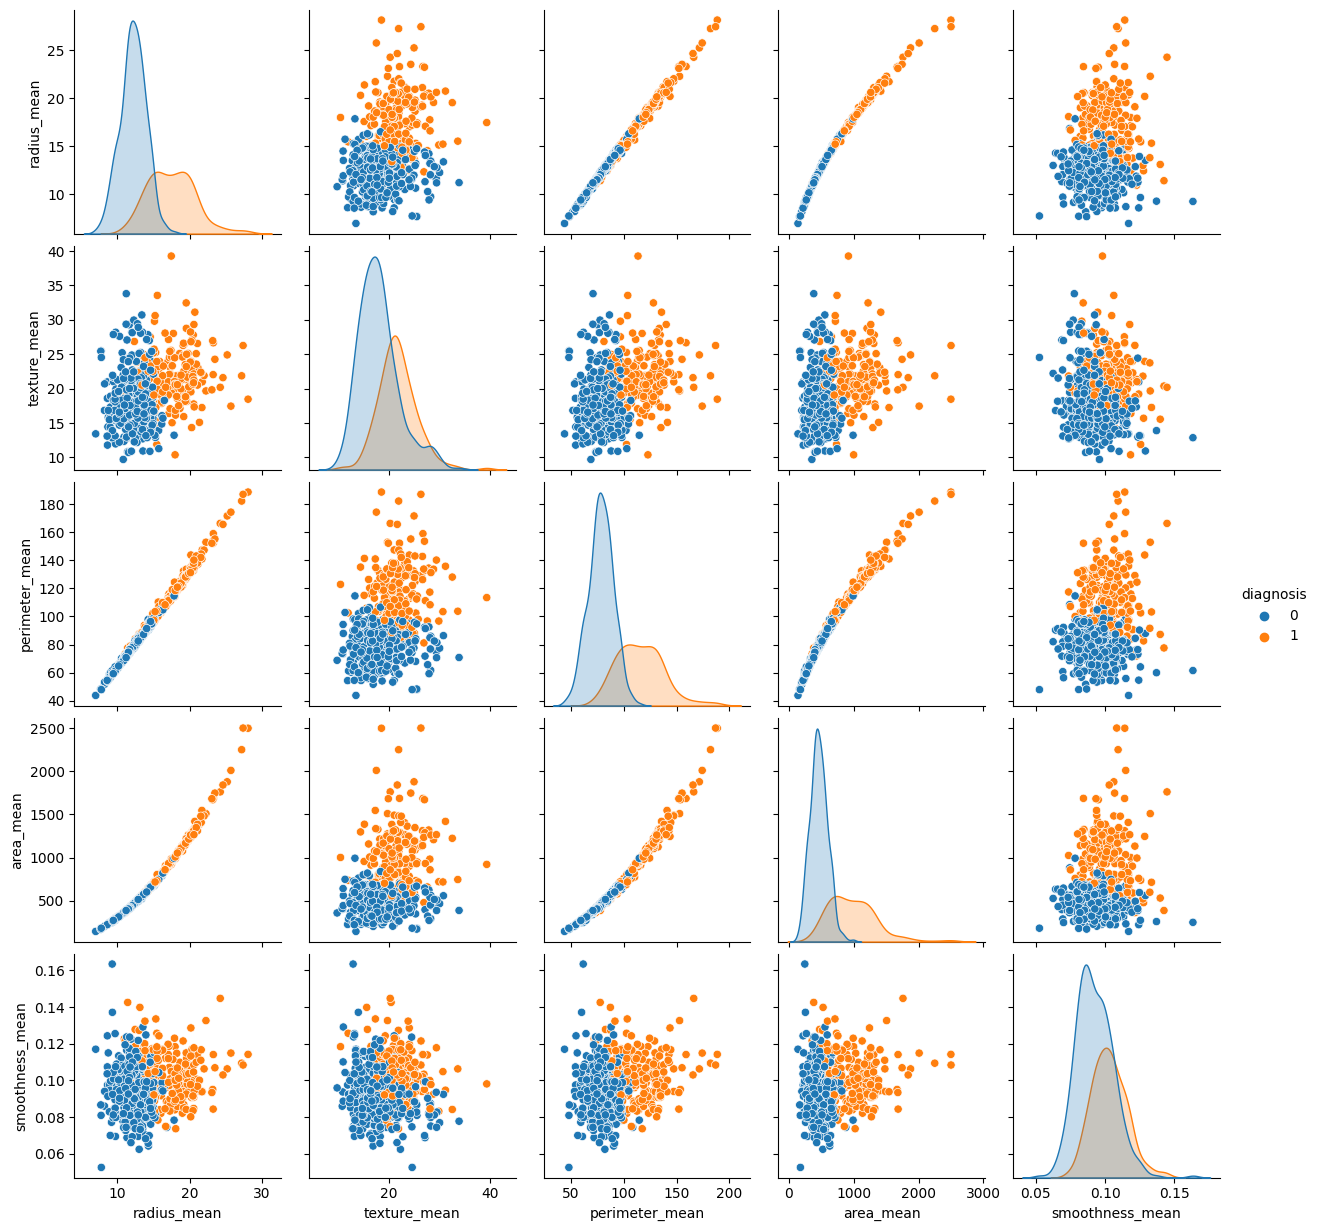

In [ ]:
#Seaborn lets us plot multiple scatter plots.It pairs all the continuous data and plots their correlation. It also plots the distribution of the data.
sns.pairplot(df.iloc[:,0:6], hue='diagnosis')
#The hue parameter determines which column in the data frame should be used for colour encoding.Basically used to split the bars.

### **Correlation of columns**

In [ ]:
#Getting the correlation of columns by using corr() function
#corr() function tells us how one column can influence the other
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [ ]:
#Finding the correlation of diagnosis and first 10 columns(1-10)
data1=df.iloc[:,0:11].corr()
data1

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


<Axes: >

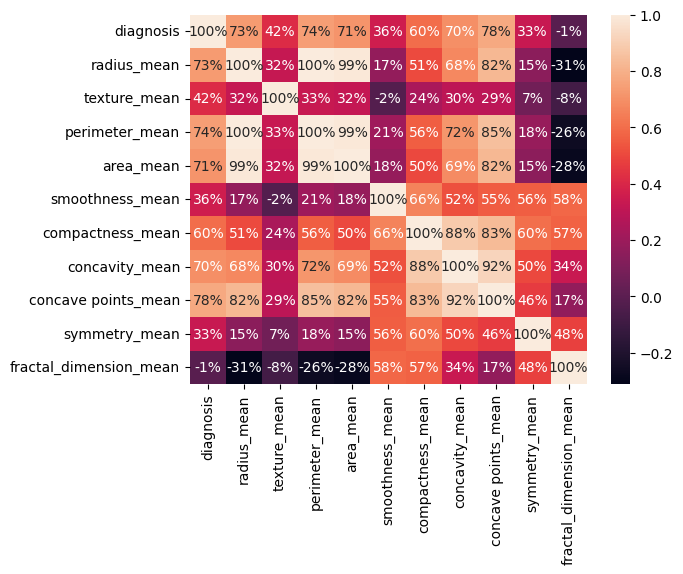

In [ ]:
#Visualize the correlation of above data using heatmap
sns.heatmap(data1,annot=True,fmt='.0%')

In [ ]:
#Finding the correlation of diagnosis and next 10 columns(11-20)
data2=df.iloc[:,[0,11,12,13,14,15,16,17,18,19,20]].corr()
data2

,diagnosis,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
diagnosis,1.000000,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972
radius_se,0.567134,1.000000,0.213247,0.972794,0.951830,0.164514,0.356065,0.332358,0.513346,0.240567,0.227754
texture_se,-0.008303,0.213247,1.000000,0.223171,0.111567,0.397243,0.231700,0.194998,0.230283,0.411621,0.279723
perimeter_se,0.556141,0.972794,0.223171,1.000000,0.937655,0.151075,0.416322,0.362482,0.556264,0.266487,0.244143
area_se,0.548236,0.951830,0.111567,0.937655,1.000000,0.075150,0.284840,0.270895,0.415730,0.134109,0.127071
smoothness_se,-0.067016,0.164514,0.397243,0.151075,0.075150,1.000000,0.336696,0.268685,0.328429,0.413506,0.427374
compactness_se,0.292999,0.356065,0.231700,0.416322,0.284840,0.336696,1.000000,0.801268,0.744083,0.394713,0.803269
concavity_se,0.253730,0.332358,0.194998,0.362482,0.270895,0.268685,0.801268,1.000000,0.771804,0.309429,0.727372
concave points_se,0.408042,0.513346,0.230283,0.556264,0.415730,0.328429,0.744083,0.771804,1.000000,0.312780,0.611044
symmetry_se,-0.006522,0.240567,0.411621,0.266487,0.134109,0.413506,0.394713,0.309429,0.312780,1.000000,0.369078


<Axes: >

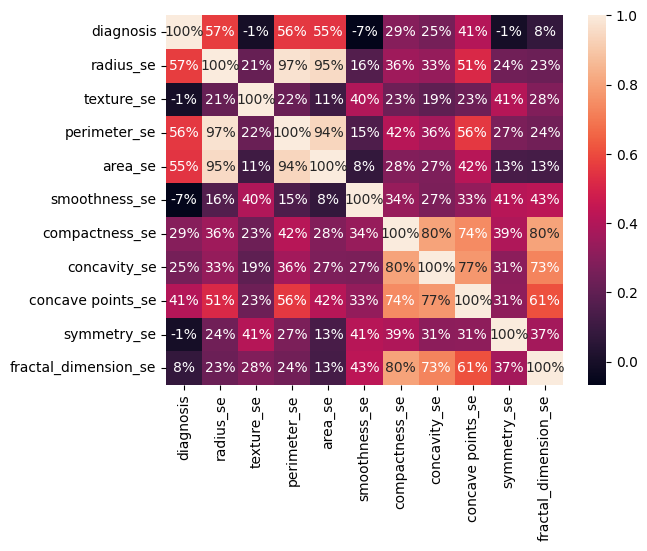

In [ ]:
#Visualize the correlation of above data using heatmap
sns.heatmap(data2,annot=True,fmt='.0%')

In [ ]:
#Finding the correlation of diagnosis and next 10 columns(21-30)
data3=df.iloc[:,[0,21,22,23,24,25,26,27,28,29,30]].corr()
data3

,diagnosis,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_worst,0.776454,1.000000,0.359921,0.993708,0.984015,0.216574,0.475820,0.573975,0.787424,0.243529,0.093492
texture_worst,0.456903,0.359921,1.000000,0.365098,0.345842,0.225429,0.360832,0.368366,0.359755,0.233027,0.219122
perimeter_worst,0.782914,0.993708,0.365098,1.000000,0.977578,0.236775,0.529408,0.618344,0.816322,0.269493,0.138957
area_worst,0.733825,0.984015,0.345842,0.977578,1.000000,0.209145,0.438296,0.543331,0.747419,0.209146,0.079647
smoothness_worst,0.421465,0.216574,0.225429,0.236775,0.209145,1.000000,0.568187,0.518523,0.547691,0.493838,0.617624
compactness_worst,0.590998,0.475820,0.360832,0.529408,0.438296,0.568187,1.000000,0.892261,0.801080,0.614441,0.810455
concavity_worst,0.659610,0.573975,0.368366,0.618344,0.543331,0.518523,0.892261,1.000000,0.855434,0.532520,0.686511
concave points_worst,0.793566,0.787424,0.359755,0.816322,0.747419,0.547691,0.801080,0.855434,1.000000,0.502528,0.511114
symmetry_worst,0.416294,0.243529,0.233027,0.269493,0.209146,0.493838,0.614441,0.532520,0.502528,1.000000,0.537848


<Axes: >

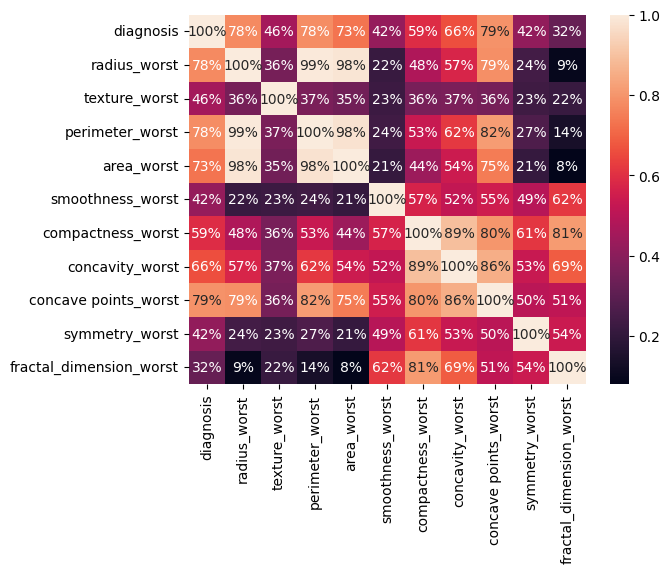

In [ ]:
#Visualize the correlation of above data using heatmap
sns.heatmap(data3,annot=True,fmt='.0%')

In [ ]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

 **outlier detections**

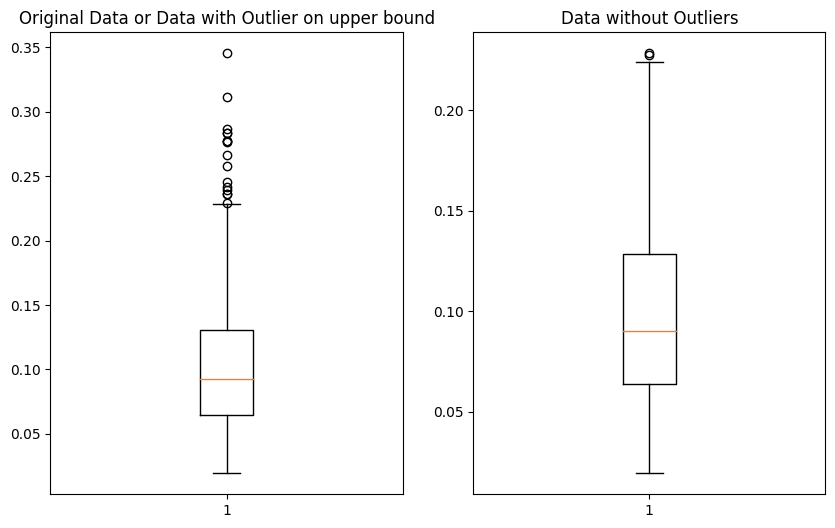

In [ ]:
# Specify the column for which you want to remove outliers
column_name = 'compactness_mean'  # Replace with the name of your specific column

# Calculate the IQR (Interquartile Range)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers and create a new DataFrame without outliers
df_no_outliers = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# Visualize the original and filtered data using a boxplot
plt.figure(figsize=(10, 6))

# Boxplot for the original data
plt.subplot(1, 2, 1)
plt.boxplot(df[column_name])
plt.title('Original Data or Data with Outlier on upper bound')

# Boxplot for the data without outliers
plt.subplot(1, 2, 2)
plt.boxplot(df_no_outliers[column_name])
plt.title('Data without Outliers')

plt.show()

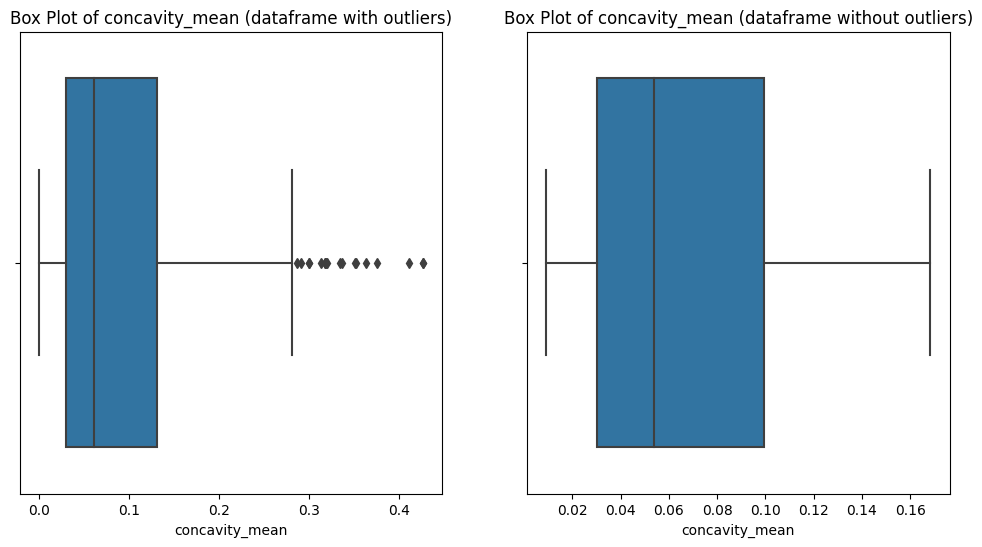

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
#file_path = 'your_file_path.csv'
#df = pd.read_csv(file_path)

# Specify the column from which you want to remove outliers
column_name = 'concavity_mean'

# Calculate Z-scores for the specified column
z_scores = np.abs((df[column_name] - df[column_name].mean()) / df[column_name].std())

# Set a Z-score threshold (e.g., 3)
threshold = 1

# Identify and remove outliers
df_no_outliers = df[z_scores < threshold]

# Visualize the data before and after removing outliers using a box plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df[column_name])
plt.title(f'Box Plot of {column_name} (dataframe with outliers)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_no_outliers[column_name])
plt.title(f'Box Plot of {column_name} (dataframe without outliers)')

plt.show()

Descriptive Statistics for concavity_mean:

count    569.000000
mean       0.088799
std        0.079720
min        0.000000
25%        0.029560
50%        0.061540
75%        0.130700
max        0.426800
Name: concavity_mean, dtype: float64


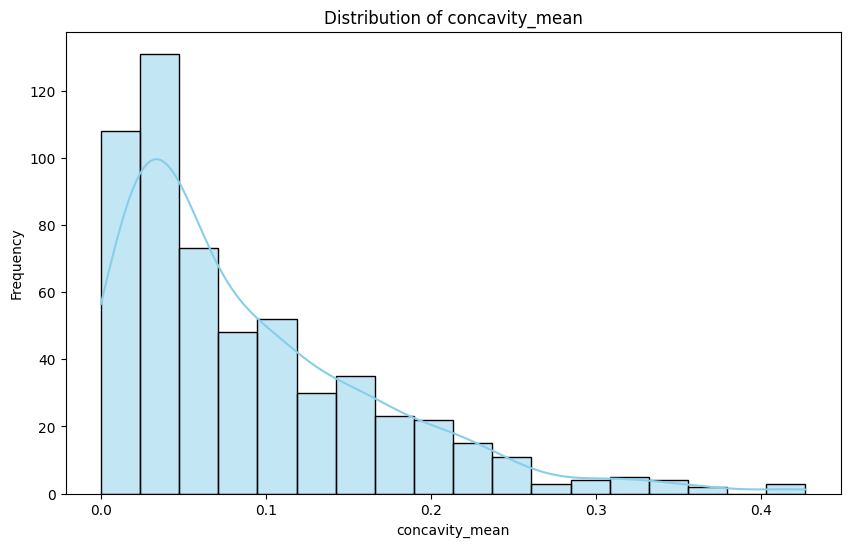

In [ ]:
# Specify the column for univariate analysis
column_name = 'concavity_mean'

# Display descriptive statistics
print(f"Descriptive Statistics for {column_name}:\n")
print(df[column_name].describe())

# Visualize the distribution using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df[column_name], kde=True, color='skyblue')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()



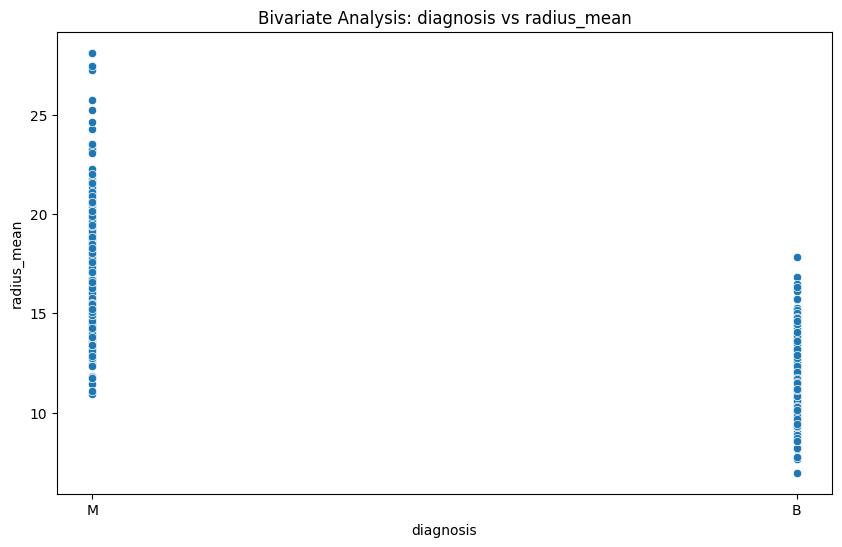

In [ ]:
# Specify the columns for bivariate analysis
x_column = 'diagnosis'  # Replace with the actual column name
y_column = 'radius_mean'  # Replace with the actual column name

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df[x_column], y=df[y_column])
plt.title(f'Bivariate Analysis: {x_column} vs {y_column}')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.show()

In [ ]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

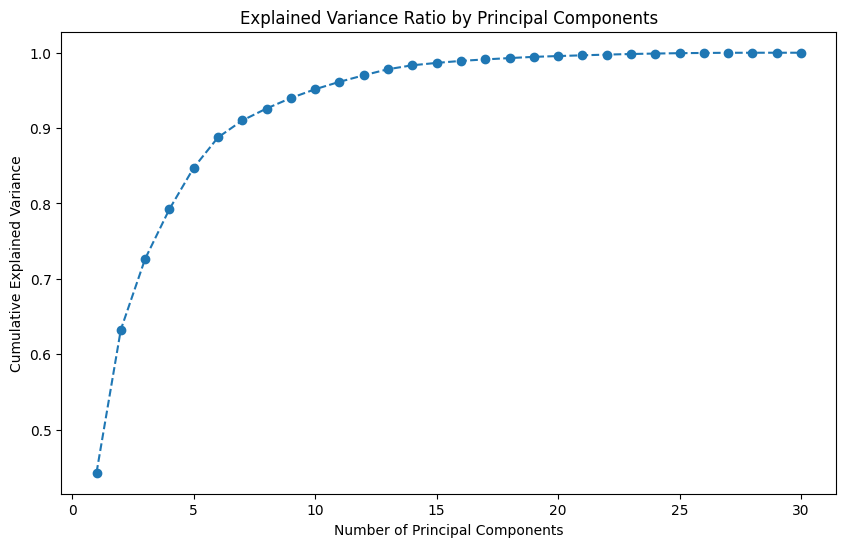

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separate features and target variable (if applicable)
X = df.drop('diagnosis', axis=1)  # Adjust 'target_column' based on your dataset
y = df['diagnosis']  # Adjust 'target_column' based on your dataset

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()

# **MACHINE LEARNING**

**Basic Steps:-**
* Split the dataset into independent(X) and dependent(Y) datasets
* Split the dataset into training and testing
* Model Building
* Prediction
* Testing model accuracy

### **Model 1:- Logistic Regression**

#### **1.Split the dataset into independent(X) and dependent(Y) datasets**

In [ ]:
#Dividing data into X and Y(converting into numpy)
X=df.iloc[:,1:31].values  #Independent dataset tells us features that detect if the patient has cancer or not
Y=df.iloc[:,0].values     #Dependent dataset tells us if the patient has cancer or not

In [ ]:
print(X)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [ ]:
print(Y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

#### **2.Split the dataset into training and testing**

In [ ]:
#Splitting dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)


In [ ]:
X_train.shape

(455, 30)

In [ ]:
X_test.shape

(114, 30)

In [ ]:
Y_train.shape

(455,)

In [ ]:
Y_test.shape

(114,)

#### **3.Model Building**

In [ ]:
#Fitting the Logistic Regression model on X and Y
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#To print the prediction of this model
pred1=model1.predict(X_test)
pred1

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0])

In [ ]:
Y_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0])

#### **5.Testing model accuracy**

In [ ]:
#Testing model accuracy on test data
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,pred1))

0.9473684210526315


### **Model 2:- Decision Tree Classifier**

#### **Model Building**

In [ ]:
#Fitting the Decision Tree Classifier model on X and Y
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier(criterion='entropy',random_state=0)
model2.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#To print the prediction of this model
pred2=model2.predict(X_test)
pred2

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1])

In [ ]:
Y_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0])

#### **Testing model accuracy**

In [ ]:
#Testing model accuracy on test data
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,pred2))

0.9298245614035088


### **Model 3:- Random Forest Classifier**

#### **Model Building**

In [ ]:
#Fitting the Random Forest Classifier model on X and Y
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier()
model3.fit(X_train,Y_train)

RandomForestClassifier()

#### **Prediction**

In [ ]:
#To print the prediction of this model
pred3=model3.predict(X_test)
pred3

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0])

In [ ]:
Y_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0])

#### **Testing model accuracy**

In [ ]:
#Testing model accuracy on test data
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,pred3)

0.9649122807017544

# Feature selection only 10 feature
## Step Forward Feature Selection (SFS)

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
sfs = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
         k_features = 10,
          forward= True,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, Y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   19.6s finished

[2023-09-05 16:31:26] Features: 1/10 -- score: 0.8923886042539978[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:   18.0s finished

[2023-09-05 16:31:45] Features: 2/10 -- score: 0.9340746778450552[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:   17.9s finished

[2023-09-05 16:32:02] Features: 3/10 -- score: 0.9516961651917404[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   17.6s finished

[2023-09-05 16:32:20] Features: 4/10 -- score: 0.9604680950163018[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:   16.2s finished



In [ ]:
sfs.k_feature_names_

('0', '1', '4', '5', '13', '20', '21', '22', '27', '28')

In [ ]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
# Define a list of feature names
feature_names =['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

# Assume you have a list of selected feature indices
selected_indices = [0, 1, 4, 5, 13, 20, 21, 22, 27, 28]

# Get the names of the selected features using their indices
selected_feature_names = [feature_names[idx] for idx in selected_indices]

print("Selected feature names:", selected_feature_names)


Selected feature names: ['diagnosis', 'radius_mean', 'area_mean', 'smoothness_mean', 'perimeter_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'concavity_worst', 'concave points_worst']


In [ ]:
sfs.k_feature_idx_

(0, 1, 4, 5, 13, 20, 21, 22, 27, 28)

In [ ]:
sfs.k_score_

0.9692400248408632

In [ ]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(27,)","[0.868421052631579, 0.8947368421052632, 0.8771...",0.892389,"(27,)",0.037303,0.023271,0.013436
2,"(13, 27)","[0.9122807017543859, 0.9473684210526315, 0.938...",0.934075,"(13, 27)",0.021023,0.013115,0.007572
3,"(13, 21, 27)","[0.9473684210526315, 0.9298245614035088, 0.956...",0.951696,"(13, 21, 27)",0.02522,0.015733,0.009084
4,"(13, 21, 22, 27)","[0.956140350877193, 0.9473684210526315, 0.9649...",0.960468,"(13, 21, 22, 27)",0.015596,0.009729,0.005617
5,"(0, 13, 21, 22, 27)","[0.9649122807017544, 0.9473684210526315, 0.956...",0.96268,"(0, 13, 21, 22, 27)",0.020702,0.012915,0.007456
6,"(0, 13, 21, 22, 27, 28)","[0.9736842105263158, 0.956140350877193, 0.9561...",0.964854,"(0, 13, 21, 22, 27, 28)",0.013969,0.008714,0.005031
7,"(0, 4, 13, 21, 22, 27, 28)","[0.9736842105263158, 0.956140350877193, 0.9736...",0.96924,"(0, 4, 13, 21, 22, 27, 28)",0.012124,0.007564,0.004367
8,"(0, 4, 13, 20, 21, 22, 27, 28)","[0.9912280701754386, 0.956140350877193, 0.9649...",0.969221,"(0, 4, 13, 20, 21, 22, 27, 28)",0.021134,0.013184,0.007612
9,"(0, 4, 5, 13, 20, 21, 22, 27, 28)","[0.9912280701754386, 0.956140350877193, 0.9649...",0.971433,"(0, 4, 5, 13, 20, 21, 22, 27, 28)",0.020782,0.012964,0.007485
10,"(0, 1, 4, 5, 13, 20, 21, 22, 27, 28)","[0.9824561403508771, 0.956140350877193, 0.9649...",0.96924,"(0, 1, 4, 5, 13, 20, 21, 22, 27, 28)",0.01568,0.009782,0.005648


# Step Backward Selection (SBS)

In [ ]:
sbs = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
         k_features = 10,
          forward= False,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   22.4s finished

[2023-09-05 16:34:14] Features: 29/10 -- score: 0.9626610774724422[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:   20.0s finished

[2023-09-05 16:34:34] Features: 28/10 -- score: 0.9670664493091135[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:   21.0s finished

[2023-09-05 16:34:55] Features: 27/10 -- score: 0.9692982456140351[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   19.0s finished

[2023-09-05 16:35:14] Features: 26/10 -- score: 0.9714524142213942[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:   18.3s finish

In [ ]:
sbs.k_score_

0.9758771929824561

In [ ]:
sbs.k_feature_names_

('0', '1', '4', '8', '10', '14', '22', '23', '24', '26')

In [ ]:
# Define a list of feature names
feature_names =['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

# Assume you have a list of selected feature indices
selected_indices = [0, 1, 4, 8, 10, 14, 22, 23, 24, 26]

# Get the names of the selected features using their indices
selected_feature_names = [feature_names[idx] for idx in selected_indices]

print("Selected feature names:", selected_feature_names)


Selected feature names: ['diagnosis', 'radius_mean', 'area_mean', 'concave points_mean', 'fractal_dimension_mean', 'area_se', 'texture_worst', 'perimeter_worst', 'area_worst', 'compactness_worst']


# Exhaustive Feature Selection (EFS)¶

In [ ]:
#from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [ ]:
#efs = EFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1),
    #     min_features= 4,
     #     max_features= 10,
      #    scoring='accuracy',
       #   cv = None,
       #   n_jobs=-1
         #).fit(X_train, Y_train)

In [ ]:
#help(efs)

In [ ]:
#efs.best_score_

In [ ]:
#efs.best_feature_names_

In [ ]:
#from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [ ]:
#plot_sfs(efs.get_metric_dict(), kind='std_dev')

## Predicting cancer using 10 features whose slected step backwars, with accuarcy of 98%

In [ ]:
df1=df[['diagnosis', 'radius_mean', 'area_mean', 'concave points_mean', 'fractal_dimension_mean', 'area_se', 'texture_worst', 'perimeter_worst', 'area_worst', 'compactness_worst' ]]

In [ ]:
print(df1)

     diagnosis  radius_mean  area_mean  concave points_mean  \
0            1        17.99     1001.0              0.14710   
1            1        20.57     1326.0              0.07017   
2            1        19.69     1203.0              0.12790   
3            1        11.42      386.1              0.10520   
4            1        20.29     1297.0              0.10430   
..         ...          ...        ...                  ...   
564          1        21.56     1479.0              0.13890   
565          1        20.13     1261.0              0.09791   
566          1        16.60      858.1              0.05302   
567          1        20.60     1265.0              0.15200   
568          0         7.76      181.0              0.00000   

     fractal_dimension_mean  area_se  texture_worst  perimeter_worst  \
0                   0.07871   153.40          17.33           184.60   
1                   0.05667    74.08          23.41           158.80   
2                   0.05999

### **Model 1:- Logistic Regression**

#### **1.Split the dataset into independent(X) and dependent(Y) datasets**

In [ ]:
#Dividing data into X1 and Y1(converting into numpy)
X1=df1.iloc[:,1:10].values  #Independent dataset tells us features that detect if the patient has cancer or not
Y1=df1.iloc[:,0].values    #Dependent dataset tells us if the patient has cancer or not

In [ ]:
print(X1)

[[1.799e+01 1.001e+03 1.471e-01 ... 1.846e+02 2.019e+03 6.656e-01]
 [2.057e+01 1.326e+03 7.017e-02 ... 1.588e+02 1.956e+03 1.866e-01]
 [1.969e+01 1.203e+03 1.279e-01 ... 1.525e+02 1.709e+03 4.245e-01]
 ...
 [1.660e+01 8.581e+02 5.302e-02 ... 1.267e+02 1.124e+03 3.094e-01]
 [2.060e+01 1.265e+03 1.520e-01 ... 1.846e+02 1.821e+03 8.681e-01]
 [7.760e+00 1.810e+02 0.000e+00 ... 5.916e+01 2.686e+02 6.444e-02]]


In [ ]:
print(Y1)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

#### **2.Split the dataset into training and testing**

In [ ]:
#Splitting dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train1,X_test1,Y_train1,Y_test1=train_test_split(X1,Y1,test_size=0.20,random_state=0)

In [ ]:
X_train1.shape

(455, 9)

In [ ]:
X_test1.shape

(114, 9)

In [ ]:
Y_train1.shape

(455,)

In [ ]:
Y_test1.shape

(114,)

#### **3.Model Building**

In [ ]:
#Fitting the Logistic Regression model on X1 and Y1
from sklearn.linear_model import LogisticRegression
model11= LogisticRegression()
model11.fit(X_train1,Y_train1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### **4.Prediction**

In [ ]:
#To print the prediction of this model
pred11=model11.predict(X_test1)
pred11

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0])

In [ ]:
Y_test1

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0])

#### **5.Testing model accuracy**

In [ ]:
#Testing model accuracy on test data
from sklearn.metrics import accuracy_score
accuracy_score(Y_test1,pred11)

0.956140350877193

### **Model 2:- Decision Tree Classifier**

#### **Model Building**

In [ ]:
#Fitting the Decision Tree Classifier model on X1 and Y1
from sklearn.tree import DecisionTreeClassifier
model22=DecisionTreeClassifier(random_state=0)
model22.fit(X_train1,Y_train1)

DecisionTreeClassifier(random_state=0)

#### **Prediction**

In [ ]:
#To print the prediction of this model
pred22=model22.predict(X_test1)
pred22

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0])

In [ ]:
Y_test1

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0])

#### **Testing model accuracy**

In [ ]:
#Testing model accuracy on test data
from sklearn.metrics import accuracy_score
accuracy_score(Y_test1,pred22)

0.9122807017543859

### **Model 3:- Random Forest Classifier**

#### **Model Building**

In [ ]:
#Fitting the Random Forest Classifier model on X1 and Y1
from sklearn.ensemble import RandomForestClassifier
model33=RandomForestClassifier()
model33.fit(X_train1,Y_train1)

RandomForestClassifier()

In [ ]:
#To print the prediction of this model
pred33=model33.predict(X_test1)
pred33

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1])

In [ ]:
Y_test1

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0])

#### **Testing model accuracy**

In [ ]:
#Testing model accuracy on test data
from sklearn.metrics import accuracy_score
accuracy_score(Y_test1,pred33)

0.9649122807017544

# Feature selection only 15 feature
## Step Forward Feature Selection (SFS)

In [ ]:
sfs = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
         k_features = 15,
          forward= True,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, Y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   22.0s finished

[2023-09-05 16:39:17] Features: 1/15 -- score: 0.8923886042539978[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:   17.6s finished

[2023-09-05 16:39:34] Features: 2/15 -- score: 0.9340746778450552[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:   17.3s finished

[2023-09-05 16:39:52] Features: 3/15 -- score: 0.9516961651917404[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   18.5s finished

[2023-09-05 16:40:10] Features: 4/15 -- score: 0.9604680950163018[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:   16.2s finished



In [ ]:
sfs.k_feature_names_

('0',
 '1',
 '4',
 '5',
 '8',
 '13',
 '14',
 '20',
 '21',
 '22',
 '23',
 '24',
 '26',
 '27',
 '28')

In [ ]:
sfs.k_score_

0.9714718211457849

In [ ]:
# Define a list of feature names
feature_names =['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

# Assume you have a list of selected feature indices
selected_indices = [0, 1, 4, 5, 8, 13, 14, 20, 21, 22, 23, 24, 26, 27, 28]

# Get the names of the selected features using their indices
selected_feature_names = [feature_names[idx] for idx in selected_indices]

print("Selected feature names:", selected_feature_names)


Selected feature names: ['diagnosis', 'radius_mean', 'area_mean', 'smoothness_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']


# Step Backward Selection (SBS)

In [ ]:
sbs = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
         k_features = 15,
          forward= False,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   20.5s finished

[2023-09-05 16:43:07] Features: 29/15 -- score: 0.9626610774724422[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:   21.8s finished

[2023-09-05 16:43:29] Features: 28/15 -- score: 0.9670664493091135[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:   19.1s finished

[2023-09-05 16:43:48] Features: 27/15 -- score: 0.9692982456140351[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   18.8s finished

[2023-09-05 16:44:06] Features: 26/15 -- score: 0.9714524142213942[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:   19.9s finish

In [ ]:
sbs.k_score_

0.9758771929824561

In [ ]:
sbs.k_feature_names_

('0',
 '1',
 '3',
 '4',
 '8',
 '10',
 '11',
 '12',
 '14',
 '17',
 '18',
 '22',
 '23',
 '24',
 '26')

In [ ]:
# Define a list of feature names
feature_names =['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

# Assume you have a list of selected feature indices
selected_indices = [0, 1, 3, 4, 8, 10, 11, 12, 14, 17, 18, 22, 23, 24, 26]

# Get the names of the selected features using their indices
selected_feature_names = [feature_names[idx] for idx in selected_indices]

print("Selected feature names:", selected_feature_names)


Selected feature names: ['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'area_se', 'concavity_se', 'concave points_se', 'texture_worst', 'perimeter_worst', 'area_worst', 'compactness_worst']


## **Predicting cancer using 15 features step backward with accuracy of 97.6**

In [ ]:
df2=df[['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'area_se', 'concavity_se', 'concave points_se', 'texture_worst', 'perimeter_worst', 'area_worst', 'compactness_worst']]
df2

,diagnosis,radius_mean,perimeter_mean,area_mean,concave points_mean,fractal_dimension_mean,radius_se,texture_se,area_se,concavity_se,concave points_se,texture_worst,perimeter_worst,area_worst,compactness_worst
0,1,17.99,122.80,1001.0,0.14710,0.07871,1.0950,0.9053,153.40,0.05373,0.01587,17.33,184.60,2019.0,0.66560
1,1,20.57,132.90,1326.0,0.07017,0.05667,0.5435,0.7339,74.08,0.01860,0.01340,23.41,158.80,1956.0,0.18660
2,1,19.69,130.00,1203.0,0.12790,0.05999,0.7456,0.7869,94.03,0.03832,0.02058,25.53,152.50,1709.0,0.42450
3,1,11.42,77.58,386.1,0.10520,0.09744,0.4956,1.1560,27.23,0.05661,0.01867,26.50,98.87,567.7,0.86630
4,1,20.29,135.10,1297.0,0.10430,0.05883,0.7572,0.7813,94.44,0.05688,0.01885,16.67,152.20,1575.0,0.20500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,142.00,1479.0,0.13890,0.05623,1.1760,1.2560,158.70,0.05198,0.02454,26.40,166.10,2027.0,0.21130
565,1,20.13,131.20,1261.0,0.09791,0.05533,0.7655,2.4630,99.04,0.03950,0.01678,38.25,155.00,1731.0,0.19220
566,1,16.60,108.30,858.1,0.05302,0.05648,0.4564,1.0750,48.55,0.04730,0.01557,34.12,126.70,1124.0,0.30940
567,1,20.60,140.10,1265.0,0.15200,0.07016,0.7260,1.5950,86.22,0.07117,0.01664,39.42,184.60,1821.0,0.86810


### **Model 1:- Logistic Regression**

#### **1.Split the dataset into independent(X) and dependent(Y) datasets**

In [ ]:
#Dividing data into X2 and Y2(converting into numpy)
X2=df2.iloc[:,1:15].values    #Independent dataset tells us features that detect if the patient has cancer or not
Y2=df2.iloc[:,0].values       #Dependent dataset tells us if the patient has cancer or not

In [ ]:
X2.shape

(569, 14)

In [ ]:
Y2.shape

(569,)

#### **2.Split the dataset into training and testing**

In [ ]:
#Splitting dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train2,X_test2,Y_train2,Y_test2=train_test_split(X2,Y2,test_size=0.20,random_state=0)

In [ ]:
X_train2.shape


(455, 14)

In [ ]:
X_test2.shape

(114, 14)

In [ ]:
Y_train2.shape

(455,)

In [ ]:
Y_test2.shape

(114,)

#### **3.Model Building**

In [ ]:
#Fitting the Logistic Regression model on X1 and Y1
from sklearn.linear_model import LogisticRegression
modelLR=LogisticRegression()
modelLR.fit(X_train2,Y_train2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

#### **4.Prediction**

In [ ]:
#To print the prediction of this model
predLR= modelLR.predict(X_test2)
predLR

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0])

In [ ]:
Y_test2

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0])

#### **5.Testing model accuracy**

In [ ]:
#Testing model accuracy on test data
from sklearn.metrics import accuracy_score
accuracy_score(Y_test2,predLR)

0.956140350877193

### **Model 2:- Decision Tree Classifier**

#### **Model Building**

In [ ]:
#Fitting the Decision Tree Classifier model on X2 and Y2
from sklearn.tree import DecisionTreeClassifier
modeltree=DecisionTreeClassifier()
modeltree.fit(X_train2,Y_train2)

DecisionTreeClassifier()

#### **Prediction**


In [ ]:
#To print the prediction of this model
predtree=modeltree.predict(X_test2)
predtree

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0])

In [ ]:
Y_test2

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0])

#### **Testing model accuracy**


In [ ]:
#Testing model accuracy on test data
from sklearn.metrics import accuracy_score
accuracy_score(Y_test2,predtree)

0.9122807017543859

### **Model 3:- Random Forest Classifier**

#### **Model Building**

In [ ]:
#Fitting the Random Forest Classifier model on X2 and Y2
from sklearn.ensemble import RandomForestClassifier
modelRFC=RandomForestClassifier()
modelRFC.fit(X_train2,Y_train2)

RandomForestClassifier()

#### **Prediction**

In [ ]:
#To print the prediction of this model
predRFC= modelRFC.predict(X_test2)
predRFC

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0])

In [ ]:
Y_test2

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0])

#### **Testing model accuracy**


In [ ]:

#Testing model accuracy on test data
from sklearn.metrics import accuracy_score
accuracy_score(Y_test2,predRFC)

0.9824561403508771

In [ ]:
#Support vector machine
'''
Code References:
1. https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/
2. https://scikit-learn.org/stable/modules/model_evaluation.html
'''

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

#initialise the Support Vector Model
support_vector_machine_model = SVC(random_state = 0)

#defining the svc parameters for grid search
parameters_grid = {'kernel': ['poly', 'rbf', 'linear', 'sigmoid'],
                   'C': [0.1, 1, 10, 100, 1000],
                   'gamma': ['scale', 'auto'],
                   'shrinking': [True, False]}

#apply exhaustice gridsearch to find the optimal solution
svm_grid_search = GridSearchCV(support_vector_machine_model, parameters_grid, scoring = 'accuracy')
#fit the data to the grid
svm_grid_search.fit(X_train1, Y_train1)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(svm_grid_search.best_params_))

#print the best model after gridsearch
print('\nThe best model after gridsearch is:\n ' + str(svm_grid_search.best_estimator_))

#svm predictions on test features
svm_prediction = svm_grid_search.predict(X_test1)

#display SVM classification Metrices for SVM
print('\nPrecision: ' + str(metrics.precision_score(Y_test1, svm_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(Y_test1, svm_prediction)))
print('Recall: ' + str(metrics.recall_score(Y_test1, svm_prediction)))
print('F1-score: ' + str(metrics.f1_score(Y_test1, svm_prediction)))

#display classification report for SVM
print('\nClassification Report:\n' + str(metrics.classification_report(Y_test1, svm_prediction)))

#display confusion matrix
print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(Y_test1, svm_prediction)))
#plot confusion matrix
sns.heatmap(metrics.confusion_matrix(Y_test1, svm_prediction), annot = True)
plt.show()

A. For SVM:

The parameters being optimized are:

1. Kernel - Kernel Values used included poly, rbf, linear and sigmoid.
2. C - C values used were 0.1, 1, 10, 100, 1000
4. Gamma - Gamma values used were scale and auto.
4. Shrinking - Shrinking values used were True and False

Accuracy is used as the performance evaluation metric because:

1. The data target class is pretty balanced. (ratio of notckd and ckd 5:3) &
2. Accuracy is good for classification problems.

Design Justifications:

1. C - Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
2. Kernel - Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape
3. Gamma - Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.If gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,if ‘auto’, uses 1 / n_features.
4. Shrinking - Whether to use the shrinking heuristic.

In [ ]:
'''
Code References:
1. https://gist.github.com/WetHat/1d6cd0f7309535311a539b42cccca89c
'''
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.text import Annotation
from mpl_toolkits.mplot3d.proj3d import proj_transform

class Annotation3D(Annotation):
    def __init__(self, text, xyz, *args, **kwargs):
        super().__init__(text, xy=(0,0), *args, **kwargs)
        self._xyz = xyz

    def draw(self, renderer):
        x2, y2, z2 = proj_transform(*self._xyz, renderer.M)
        self.xy=(x2,y2)
        super().draw(renderer)

def _annotate3D(ax,text, xyz, *args, **kwargs):
    '''Add anotation `text` to an `Axes3d` instance.'''

    annotation= Annotation3D(text, xyz, *args, **kwargs)
    ax.add_artist(annotation)

setattr(Axes3D,'annotate3D',_annotate3D)


In [ ]:
'''
Code References:
1. https://stackoverflow.com/questions/52285104/3d-scatterplots-in-python-with-hue-colormap-and-legend
'''
sns.set_style("whitegrid", {'axes.grid' : False})

#initialise empty lists
svm_C = []
svm_gamma = []
svm_kernel = []
svm_shrinking = []
svm_accuracy = []

#loop through Gridsearch results to get accuracy at each parameter combination
for each_accuracy in svm_grid_search.cv_results_['mean_test_score']:
        svm_accuracy.append(each_accuracy)

#loop through the parameter combinations to get each parameter value
for each_parameter_combination in svm_grid_search.cv_results_['params']:
    svm_C.append(each_parameter_combination['C'])
    svm_gamma.append(each_parameter_combination['gamma'])
    svm_kernel.append(each_parameter_combination['kernel'])
    svm_shrinking.append(each_parameter_combination['shrinking'])

#merge all the above lists into one single dataframe to summarize the SVM cross validation result
cross_validation_results_df = pd.DataFrame(svm_C, columns = ['C'])
cross_validation_results_df = cross_validation_results_df.join(pd.DataFrame(svm_gamma, columns = ['gamma']))
cross_validation_results_df = cross_validation_results_df.join(pd.DataFrame(svm_kernel, columns = ['kernel']))
cross_validation_results_df = cross_validation_results_df.join(pd.DataFrame(svm_shrinking, columns = ['shrinking']))
cross_validation_results_df = cross_validation_results_df.join(pd.DataFrame(svm_accuracy, columns = ['Accuracy']))

#encode the categorical SVM parameters of kernel, Shrinking and Gamma
svm_plot_encoder = preprocessing.LabelEncoder()
encoded_kernel = svm_plot_encoder.fit_transform(cross_validation_results_df['kernel'])
encoded_shrinking = svm_plot_encoder.fit_transform(cross_validation_results_df['shrinking'])
encoded_gamma = svm_plot_encoder.fit_transform(cross_validation_results_df['gamma'])

print('Please note that Shrinking has been encoded whereby 0 = False, 1 = True')
print('Please note that Gamma has been encoded whereby 0 = auto, 1 = scale')

#Save best model parameters
svm_best_parameters = svm_grid_search.best_params_

#For annotation purposes
best_accuracy_svm = max(cross_validation_results_df['Accuracy'])
best_C_svm = svm_best_parameters['C']
best_gamma_svm = svm_best_parameters['gamma']
best_kernel_svm = svm_best_parameters['kernel']
best_shrinking_svm = svm_best_parameters['shrinking']

#encoding best shrinking
if (best_shrinking_svm == 'False'):
    best_shrinking_svm = 0
elif (best_shrinking_svm == 'True'):
    best_shrinking_svm = 1

#encoding best Gamma
if (best_gamma_svm == 'auto'):
    best_gamma_svm = 0
elif (best_gamma_svm == 'scale'):
    best_gamma_svm = 1

#PLOT 1: C vs Shrinking Vs Accuracy Plot
#assign a 6x6 figure size
fig1 = plt.figure(figsize=(6,6))
#initialise a 3-D plot
ax1 = Axes3D(fig1)
#plot a 3-D scatter plot
scatter1 = ax1.scatter(cross_validation_results_df['C'], encoded_shrinking,
                      cross_validation_results_df['Accuracy'], marker='o', c = encoded_kernel, depthshade=False, cmap='Paired')
#assign axes titles
ax1.set_title('3-D plot of SVM C parameter vs Shrinking parameter vs Accuracy.')
ax1.set_xlabel('C Parameter')
ax1.set_ylabel('Shrinking Parameter')
ax1.set_zlabel('Accuracy')
#produce a legend with the unique colors from the scatter
legend1 = ax1.legend(*scatter1.legend_elements(), loc="lower center", title="Encoded Kernel [0=linear, 1=poly, 2=rbf, 3 =sigmoid]", borderaxespad=-10, ncol=4)
ax1.add_artist(legend1)
#annotation
parameters_annotation1 = 'Best Parameters for the SVM\nC Parameter: ' + str(best_C_svm) + '\nShrinking: ' + str(best_shrinking_svm)
ax1.annotate3D(parameters_annotation1, (best_C_svm, best_shrinking_svm, best_accuracy_svm), xytext=(-70,-70), textcoords='offset points', bbox=dict(boxstyle="round", fc="lightyellow"), arrowprops = dict(arrowstyle="-|>",ec='black', fc='white', lw=3))
plt.show()

#PLOT 2: Gamma vs Shrinking Vs Accuracy Plot
#assign a 6x6 figure size
fig2 = plt.figure(figsize=(6,6))
#initialise a 3-D plot
ax2 = Axes3D(fig2)
#plot a 3-D scatter plot
scatter2 = ax2.scatter(encoded_gamma, encoded_shrinking,
                       cross_validation_results_df['Accuracy'], marker='o', c = encoded_kernel, depthshade=False, cmap='Paired')
#assign axes titles
ax2.set_title('3-D plot of SVM Gamma parameter vs Shrinking parameter vs Accuracy.')
ax2.set_xlabel('Gamma Parameter')
ax2.set_ylabel('Shrinking Parameter')
ax2.set_zlabel('Accuracy')
#produce a legend with the unique colors from the scatter
legend2 = ax2.legend(*scatter2.legend_elements(), loc="lower center", title="Encoded Kernel [0=linear, 1=poly, 2=rbf, 3 =sigmoid]", borderaxespad=-10, ncol=4)
ax2.add_artist(legend2)
#annotation
parameters_annotation2 = 'Best Parameters for the SVM\nGamma: ' + str(best_gamma_svm) + '\nShrinking: ' + str(best_shrinking_svm)
ax2.annotate3D(parameters_annotation2, (best_gamma_svm, best_shrinking_svm, best_accuracy_svm), xytext=(-110,-80), textcoords='offset points', bbox=dict(boxstyle="round", fc="lightyellow"), arrowprops = dict(arrowstyle="-|>",ec='black', fc='white', lw=3))
plt.show()

#PLOT 3: Gamma vs C Vs Accuracy Plot
#assign a 6x6 figure size
fig3 = plt.figure(figsize=(6,6))
#initialise a 3-D plot
ax3 = Axes3D(fig3)
#plot a 3-D scatter plot
scatter3 = ax3.scatter(encoded_gamma, cross_validation_results_df['C'],
                       cross_validation_results_df['Accuracy'], marker='o', c = encoded_kernel, depthshade=False, cmap='Paired')
#assign axes titles
ax3.set_title('3-D plot of SVM Gamma parameter vs C parameter vs Accuracy.')
ax3.set_xlabel('Gamma Parameter')
ax3.set_ylabel('C Parameter')
ax3.set_zlabel('Accuracy')
#produce a legend with the unique colors from the scatter
legend3 = ax3.legend(*scatter3.legend_elements(), loc="lower center", title="Encoded Kernel [0=linear, 1=poly, 2=rbf, 3 =sigmoid]", borderaxespad=-10, ncol=4)
ax3.add_artist(legend3)
#annotation
parameters_annotation3 = 'Best Parameters for the SVM\nGamma: ' + str(best_gamma_svm) + '\nC: ' + str(best_C_svm)
ax3.annotate3D(parameters_annotation3, (best_gamma_svm, best_C_svm, best_accuracy_svm), xytext=(-70,-110), textcoords='offset points', bbox=dict(boxstyle="round", fc="lightyellow"), arrowprops = dict(arrowstyle="-|>",ec='black', fc='white', lw=3))
plt.show()

In [ ]:
#K-Nearest Neighbour
'''
Code References:
1. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
'''
from sklearn.neighbors import KNeighborsClassifier

#initialise the k nearest neighbour Model
k_nearest_neighbour_model = KNeighborsClassifier()

#defining the knn parameters for grid search
knn_parameters_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                       'weights': ['uniform', 'distance'],
                       'algorithm':['auto', 'ball_tree','kd_tree','brute'],
                       'n_jobs':[1, -1]}

#apply exhaustice gridsearch to find the optimal solution
knn_grid_search = GridSearchCV(k_nearest_neighbour_model, knn_parameters_grid, scoring = 'accuracy')
#fit the data to the grid
knn_grid_search.fit(X_train1, Y_train1)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(knn_grid_search.best_params_))

#print the best model after gridsearch
print('\nThe best model after gridsearch is:\n ' + str(knn_grid_search.best_estimator_))

#KNN predictions on test features
knn_prediction = knn_grid_search.predict(X_test1)

#display KNN classification Metrices for SVM
print('\nPrecision: ' + str(metrics.precision_score(Y_test1, knn_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(Y_test1, knn_prediction)))
print('Recall: ' + str(metrics.recall_score(Y_test1, knn_prediction)))
print('F1-score: ' + str(metrics.f1_score(Y_test1, knn_prediction)))

#display classification report for KNN
print('\nClassification Report:\n' + str(metrics.classification_report(Y_test1, knn_prediction)))

#display confusion matrix
print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(Y_test1, knn_prediction)))
#plot confusion matrix
sns.heatmap(metrics.confusion_matrix(Y_test1, knn_prediction), annot = True)
plt.show()

B. For KNN:

defining the knn parameters for grid search knn_parameters_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'weights': ['uniform', 'distance'], 'algorithm':['auto', 'ball_tree','kd_tree','brute'], 'n_jobs':[1, -1]}

The parameters being optimized are:

1. n_neighbours - N_neighbours values used are in the range of 1 to 10.
2. weights - Weights values used were uniform and distance
3. algorithm - Algorithm values used were auto, ball_tree, kd_tree and brute.
4. n_jobs - n_jobs values used were 1 and -1.

Accuracy is used as the performance evaluation metric because:

1. The data target class is pretty balanced. (ratio of 1 and 0 5:3) &
2. Accuracy is good for classification problems.

Design Justifications:

1. N_neighbours - Number of neighbors to use by default for kneighbors queries.
2. Weights - ‘uniform’ : all points in each neighborhood are weighted equally; 'distance’ : closer neighbors of a query point will have a greater influence than neighbors which are further away.
3. Algorithm - ‘ball_tree’ will use BallTree, ‘kd_tree’ will use KDTree, ‘brute’ will use a brute-force search and ‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.
4. N_jobs - 1 means using 1 processor and -1 means using all processors

In [ ]:
'''
Code References:
1. https://stackoverflow.com/questions/52285104/3d-scatterplots-in-python-with-hue-colormap-and-legend
'''

#initialise empty lists
knn_n_neighbours = []
knn_weights = []
knn_algorithm = []
knn_n_jobs = []
knn_accuracy = []

#loop through Gridsearch results to get accuracy at each parameter combination
for each_accuracy in knn_grid_search.cv_results_['mean_test_score']:
        knn_accuracy.append(each_accuracy)

#loop through the parameter combinations to get each parameter value
for each_parameter_combination in knn_grid_search.cv_results_['params']:
    knn_n_neighbours.append(each_parameter_combination['n_neighbors'])
    knn_weights.append(each_parameter_combination['weights'])
    knn_algorithm.append(each_parameter_combination['algorithm'])
    knn_n_jobs.append(each_parameter_combination['n_jobs'])

#merge all the above lists into one single dataframe to summarize the KNN cross validation result
cross_validation_results_df1 = pd.DataFrame(knn_n_neighbours, columns = ['n_neighbors'])
cross_validation_results_df1 = cross_validation_results_df1.join(pd.DataFrame(knn_weights, columns = ['weights']))
cross_validation_results_df1 = cross_validation_results_df1.join(pd.DataFrame(knn_algorithm, columns = ['algorithm']))
cross_validation_results_df1 = cross_validation_results_df1.join(pd.DataFrame(knn_n_jobs, columns = ['n_jobs']))
cross_validation_results_df1 = cross_validation_results_df1.join(pd.DataFrame(knn_accuracy, columns = ['Accuracy']))

#encode the categorical KNN parameters of weights and algorithms
knn_plot_encoder = preprocessing.LabelEncoder()
encoded_weights = knn_plot_encoder.fit_transform(cross_validation_results_df1['weights'])
encoded_algorithms = knn_plot_encoder.fit_transform(cross_validation_results_df1['algorithm'])

print('Please note that Algorithms has been encoded whereby 0 = auto, 1 = ball_tree, 2 = brute, 3 = kd_tree')

#Save best model parameters
knn_best_parameters = knn_grid_search.best_params_

#For annotation purposes
best_accuracy_knn = max(cross_validation_results_df1['Accuracy'])
best_n_neighbour_knn = knn_best_parameters['n_neighbors']
best_weight_knn = knn_best_parameters['weights']
best_algorithm_knn = knn_best_parameters['algorithm']
best_n_jobs_knn = knn_best_parameters['n_jobs']

#encoding best splitter
if (best_algorithm_knn == 'auto'):
    best_algorithm_knn = 0
elif (best_algorithm_knn == 'ball_tree'):
    best_algorithm_knn = 1
elif (best_algorithm_knn == 'brute'):
    best_algorithm_knn = 2
elif (best_algorithm_knn == 'kd_tree'):
    best_algorithm_knn = 3

#PLOT 1: n_neighbour vs algorithms Vs Accuracy Plot
#assign a 6x6 figure size
fig4 = plt.figure(figsize=(6,6))
#initialise a 3-D plot
ax4 = Axes3D(fig4)
#plot a 3-D scatter plot
scatter4 = ax4.scatter(cross_validation_results_df1['n_neighbors'], encoded_algorithms,
                      cross_validation_results_df1['Accuracy'], marker='o', c = encoded_weights, depthshade=False, cmap='Paired')
#assign axes titles
ax4.set_title('3-D plot of KNN n_neighbors parameter vs algoritms parameter vs Accuracy.')
ax4.set_xlabel('n_neighbors Parameter')
ax4.set_ylabel('algorithms Parameter')
ax4.set_zlabel('Accuracy')
#produce a legend with the unique colors from the scatter
legend4 = ax4.legend(*scatter4.legend_elements(), loc="lower center", title="Encoded Weights [0=distance, 1=uniform]", borderaxespad=-10, ncol=4)
ax4.add_artist(legend4)
#annotation
parameters_annotation4 = 'Best Parameters for the KNN\nn_neighbors: ' + str(best_n_neighbour_knn) + '\nalgorithms: ' + str(best_algorithm_knn)
ax4.annotate3D(parameters_annotation4, (best_n_neighbour_knn, best_algorithm_knn, best_accuracy_knn), xytext=(-70,-70), textcoords='offset points', bbox=dict(boxstyle="round", fc="lightyellow"), arrowprops = dict(arrowstyle="-|>",ec='black', fc='white', lw=3))
plt.show()

#PLOT 2: n_neighbour vs n_job Vs Accuracy Plot
#assign a 6x6 figure size
fig5 = plt.figure(figsize=(6,6))
#initialise a 3-D plot
ax5 = Axes3D(fig5)
#plot a 3-D scatter plot
scatter5 = ax5.scatter(cross_validation_results_df1['n_neighbors'], cross_validation_results_df1['n_jobs'],
                       cross_validation_results_df1['Accuracy'], marker='o', c = encoded_weights, depthshade=False, cmap='Paired')
#assign axes titles
ax5.set_title('3-D plot of KNN n_neighbor parameter vs n_job parameter vs Accuracy.')
ax5.set_xlabel('n_neighbors Parameter')
ax5.set_ylabel('n_jobs Parameter')
ax5.set_zlabel('Accuracy')
#produce a legend with the unique colors from the scatter
legend5 = ax5.legend(*scatter5.legend_elements(), loc="lower center", title="Encoded Weights [0=distance, 1=uniform]", borderaxespad=-10, ncol=4)
ax5.add_artist(legend5)
#annotation
parameters_annotation5 = 'Best Parameters for the KNN\nn_neighbors: ' + str(best_n_neighbour_knn) + '\nn_job: ' + str(best_n_jobs_knn)
ax5.annotate3D(parameters_annotation5, (best_n_neighbour_knn, best_n_jobs_knn, best_accuracy_knn), xytext=(-100,-70), textcoords='offset points', bbox=dict(boxstyle="round", fc="lightyellow"), arrowprops = dict(arrowstyle="-|>",ec='black', fc='white', lw=3))
plt.show()

#PLOT 3: algorithm vs n_job C Vs Accuracy Plot
#assign a 6x6 figure size
fig6 = plt.figure(figsize=(6,6))
#initialise a 3-D plot
ax6 = Axes3D(fig6)
#plot a 3-D scatter plot
scatter6 = ax6.scatter(cross_validation_results_df1['n_jobs'], encoded_algorithms,
                       cross_validation_results_df1['Accuracy'], marker='o', c = encoded_weights, depthshade=False, cmap='Paired')
#assign axes titles
ax6.set_title('3-D plot of KNN n_jobs parameter vs algorithm parameter vs Accuracy.')
ax6.set_xlabel('n_jobs Parameter')
ax6.set_ylabel('algorithm Parameter')
ax6.set_zlabel('Accuracy')
#produce a legend with the unique colors from the scatter
legend6 = ax6.legend(*scatter6.legend_elements(), loc="lower center", title="Encoded Weights [0=distance, 1=uniform]", borderaxespad=-10, ncol=4)
ax6.add_artist(legend6)
#annotation
parameters_annotation6 = 'Best Parameters for the KNN\nn_jobs: ' + str(best_n_jobs_knn) + '\nalgorithm: ' + str(best_algorithm_knn)
ax6.annotate3D(parameters_annotation5, (best_n_jobs_knn, best_algorithm_knn, best_accuracy_knn), xytext=(-140,-150), textcoords='offset points', bbox=dict(boxstyle="round", fc="lightyellow"), arrowprops = dict(arrowstyle="-|>",ec='black', fc='white', lw=3))
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarn

The best parameters are:
 {'criterion': 'entropy', 'max_features': 'auto', 'min_samples_leaf': 4, 'splitter': 'best'}

The best model after gridsearch is:
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       min_samples_leaf=4, random_state=0)

Precision: 0.8775510204081632
Accuracy: 0.9122807017543859
Recall: 0.9148936170212766
F1-score: 0.8958333333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        67
           1       0.88      0.91      0.90        47

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114


Confusion Matrix: 
[[61  6]
 [ 4 43]]


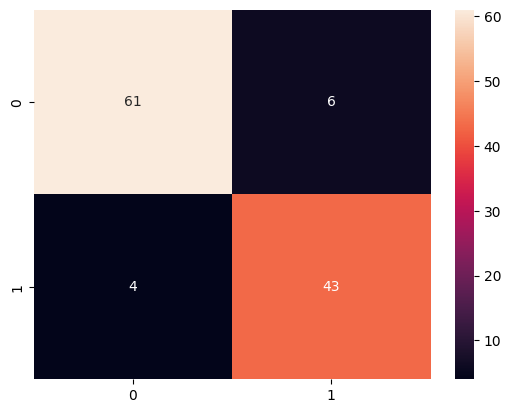

In [ ]:
#Decision tree
'''
Code References:
1. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
'''
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

#initialise the decision tree Model
decision_tree_model = DecisionTreeClassifier(random_state = 0)

#defining the decision tree parameters for grid search
dt_parameters_grid = {'criterion': ['gini', 'entropy'],
                      'splitter': ['best', 'random'],
                      'min_samples_leaf': [1, 2, 3, 4, 5],
                      'max_features': ['auto', 'sqrt', 'log2']}

#apply exhaustice gridsearch to find the optimal solution
dt_grid_search = GridSearchCV(decision_tree_model, dt_parameters_grid, scoring = 'accuracy')
#fit the data to the grid
dt_grid_search.fit(X_train2, Y_train2)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(dt_grid_search.best_params_))

#print the best model after gridsearch
print('\nThe best model after gridsearch is:\n ' + str(dt_grid_search.best_estimator_))

#Decision Tree predictions on test features
dt_prediction = dt_grid_search.predict(X_test2)

#display KNN classification Metrices for Decision Tree
print('\nPrecision: ' + str(metrics.precision_score(Y_test2, dt_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(Y_test2, dt_prediction)))
print('Recall: ' + str(metrics.recall_score(Y_test2, dt_prediction)))
print('F1-score: ' + str(metrics.f1_score(Y_test2, dt_prediction)))

#display classification report for Decision Tree
print('\nClassification Report:\n' + str(metrics.classification_report(Y_test2, dt_prediction)))

#display confusion matrix
print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(Y_test2, dt_prediction)))
#plot confusion matrix
sns.heatmap(metrics.confusion_matrix(Y_test2, dt_prediction), annot = True)
plt.show()

C. For Decision Tree:

The parameters being optimized are:

1. Criterion - Criterion Values used included gini and entropy.
2. Splitter - Splitter values used were best and random.
3. Min_samples_leaf - Min_samples_leaf values used were in range of 1 to 5.
4. Max_features - Max_features values used were auto, sqrt and log2.

Accuracy is used as the performance evaluation metric because:

1. The data target class is pretty balanced. (ratio of 1 and 0 5:3) &
2. Accuracy is good for classification problems.

Design Justifications:

1. Criterion - to measure the quality of a split. “Gini” is for the Gini impurity and “entropy” is for the information gain.
2. Splitter - to choose the split at each node. “Best” is to choose the best split and “random” is to choose the best random split.
3. Min_samples_leaf - split point at any depth will only be considered. This may have the effect of smoothing the model.
4. Max_features - number of features to consider when looking for the best split.

In [ ]:
'''
Code References:
1. https://stackoverflow.com/questions/52285104/3d-scatterplots-in-python-with-hue-colormap-and-legend
'''
from sklearn import preprocessing
#initialise empty lists
dt_criterion = []
dt_splitter = []
dt_min_samples_leaf = []
dt_max_features = []
dt_accuracy = []

#loop through Gridsearch results to get accuracy at each parameter combination
for each_accuracy in dt_grid_search.cv_results_['mean_test_score']:
        dt_accuracy.append(each_accuracy)

#loop through the parameter combinations to get each parameter value
for each_parameter_combination in dt_grid_search.cv_results_['params']:
    dt_criterion.append(each_parameter_combination['criterion'])
    dt_splitter.append(each_parameter_combination['splitter'])
    dt_min_samples_leaf.append(each_parameter_combination['min_samples_leaf'])
    dt_max_features.append(each_parameter_combination['max_features'])

#merge all the above lists into one single dataframe to summarize the decision tree cross validation result
cross_validation_results_df2 = pd.DataFrame(dt_criterion, columns = ['criterion'])
cross_validation_results_df2 = cross_validation_results_df2.join(pd.DataFrame(dt_splitter, columns = ['splitter']))
cross_validation_results_df2 = cross_validation_results_df2.join(pd.DataFrame(dt_min_samples_leaf, columns = ['min_samples_leaf']))
cross_validation_results_df2 = cross_validation_results_df2.join(pd.DataFrame(dt_max_features, columns = ['max_features']))
cross_validation_results_df2 = cross_validation_results_df2.join(pd.DataFrame(dt_accuracy, columns = ['Accuracy']))

#encode the categorical decision parameters of weights and algorithms
dt_plot_encoder = preprocessing.LabelEncoder()
encoded_splitter = dt_plot_encoder.fit_transform(cross_validation_results_df2['splitter'])
encoded_criterion = dt_plot_encoder.fit_transform(cross_validation_results_df2['criterion'])
encoded_max_features = dt_plot_encoder.fit_transform(cross_validation_results_df2['max_features'])

print('Please note that splitter has been encoded whereby 0 = best, 1 = random')
print('Please note that max_features has been encoded whereby 0 = auto, 1 = log2 and 2 = sqrt')

#Save best model parameters
dt_best_parameters = dt_grid_search.best_params_

#For annotation purposes
best_accuracy_dt = max(cross_validation_results_df2['Accuracy'])
best_min_samples_leaf_dt = dt_best_parameters['min_samples_leaf']
best_max_features_dt = dt_best_parameters['max_features']
best_criterion_dt = dt_best_parameters['criterion']
best_splitter_dt = dt_best_parameters['splitter']

#encoding best splitter
if (best_splitter_dt == 'best'):
    best_splitter_dt = 0
elif (best_splitter_dt == 'random'):
    best_splitter_dt = 1

#encoding best max feature
if (best_max_features_dt == 'auto'):
    best_max_features_dt = 0
elif (best_max_features_dt == 'log2'):
    best_max_features_dt = 1
elif (best_max_features_dt == 'sqrt'):
    best_max_features_dt = 2

#PLOT 1: splitter vs min_samples_leaf Vs Accuracy Plot
#assign a 6x6 figure size
fig7 = plt.figure(figsize=(6,6))
#initialise a 3-D plot
ax7 = Axes3D(fig7)
#plot a 3-D scatter plot
scatter7 = ax7.scatter(encoded_splitter, cross_validation_results_df2['min_samples_leaf'],
                       cross_validation_results_df2['Accuracy'], marker='o', c = encoded_criterion, depthshade=False, cmap='Paired')
#assign axes titles
ax7.set_title('3-D plot of Decision Tree splitter parameter vs min_samples_leaf parameter vs Accuracy.')
ax7.set_xlabel('splitter Parameter')
ax7.set_ylabel('min_samples_leaf Parameter')
ax7.set_zlabel('Accuracy')
#produce a legend with the unique colors from the scatter
legend7 = ax7.legend(*scatter7.legend_elements(), loc="lower center", title="Encoded Criterion [0=entropy, 1=gini]", borderaxespad=-10, ncol=4)
ax7.add_artist(legend7)
#annotation
parameters_annotation7 = 'Best Parameters for the Decision Tree\nsplitter: ' + str(best_splitter_dt) + '\nmin_samples_leaf: ' + str(best_min_samples_leaf_dt)
ax7.annotate3D(parameters_annotation7,(best_splitter_dt, best_min_samples_leaf_dt, best_accuracy_dt), xytext=(70,-70), textcoords='offset points', bbox=dict(boxstyle="round", fc="lightyellow"), arrowprops = dict(arrowstyle="-|>",ec='black', fc='white', lw=3))
plt.show()

#PLOT 2: max_features vs min_samples_leaf Vs Accuracy Plot
#assign a 6x6 figure size
fig8 = plt.figure(figsize=(6,6))
#initialise a 3-D plot
ax8 = Axes3D(fig8)
#plot a 3-D scatter plot
scatter8 = ax8.scatter(encoded_max_features, cross_validation_results_df2['min_samples_leaf'],
                       cross_validation_results_df2['Accuracy'], marker='o', c = encoded_criterion, depthshade=False, cmap='Paired')
#assign axes titles
ax8.set_title('3-D plot of Decision Tree max_features parameter vs min_samples_leaf parameter vs Accuracy.')
ax8.set_xlabel('max_features Parameter')
ax8.set_ylabel('min_samples_leaf Parameter')
ax8.set_zlabel('Accuracy')
#produce a legend with the unique colors from the scatter
legend8 = ax8.legend(*scatter8.legend_elements(), loc="lower center", title="Encoded Criterion [0=entropy, 1=gini]", borderaxespad=-10, ncol=4)
ax8.add_artist(legend8)
#annotation
parameters_annotation8 = 'Best Parameters for the Decision Tree\nmax_features: ' + str(best_max_features_dt) + '\nmin_samples_leaf: ' + str(best_min_samples_leaf_dt)
ax8.annotate3D(parameters_annotation8,(best_max_features_dt, best_min_samples_leaf_dt, best_accuracy_dt), xytext=(-100,-150), textcoords='offset points', bbox=dict(boxstyle="round", fc="lightyellow"), arrowprops = dict(arrowstyle="-|>",ec='black', fc='white', lw=3))
plt.show()

#PLOT 3: max_features vs splitter Vs Accuracy Plot
#assign a 6x6 figure size
fig9 = plt.figure(figsize=(6,6))
#initialise a 3-D plot
ax9 = Axes3D(fig9)
#plot a 3-D scatter plot
scatter9 = ax9.scatter(encoded_max_features, encoded_splitter,
                       cross_validation_results_df2['Accuracy'], marker='o', c = encoded_criterion, depthshade=False, cmap='Paired')
#assign axes titles
ax9.set_title('3-D plot of Decision Tree max_features parameter vs splitter parameter vs Accuracy.')
ax9.set_xlabel('max_features Parameter')
ax9.set_ylabel('splitter Parameter')
ax9.set_zlabel('Accuracy')
#produce a legend with the unique colors from the scatter
legend9 = ax9.legend(*scatter9.legend_elements(), loc="lower center", title="Encoded Criterion [0=entropy, 1=gini]", borderaxespad=-10, ncol=4)
ax9.add_artist(legend9)
#annotation
parameters_annotation9 = 'Best Parameters for the Decision Tree\nmax_features: ' + str(best_max_features_dt) + '\nsplitter: ' + str(best_splitter_dt)
ax9.annotate3D(parameters_annotation9,(best_max_features_dt, best_splitter_dt, best_accuracy_dt), xytext=(-100,-150), textcoords='offset points', bbox=dict(boxstyle="round", fc="lightyellow"), arrowprops = dict(arrowstyle="-|>",ec='black', fc='white', lw=3))
plt.show()

Please note that splitter has been encoded whereby 0 = best, 1 = random
Please note that max_features has been encoded whereby 0 = auto, 1 = log2 and 2 = sqrt


<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifi

The best parameters are:
 {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 3, 'n_estimators': 30}

The best model after gridsearch is:
 RandomForestClassifier(max_features='auto', min_samples_split=3,
                       n_estimators=30, random_state=0)

Precision: 0.9183673469387755
Accuracy: 0.9473684210526315
Recall: 0.9574468085106383
F1-score: 0.9375000000000001

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        67
           1       0.92      0.96      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114


Confusion Matrix: 
[[63  4]
 [ 2 45]]


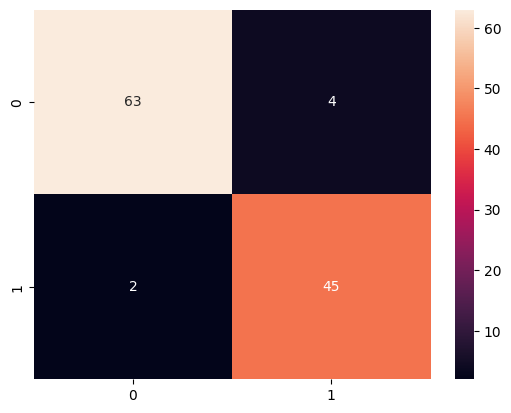

In [ ]:
#Random forest
'''
Code References:
1. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
'''
from sklearn.ensemble import RandomForestClassifier

#initialise the random forest Model
random_forest_model = RandomForestClassifier(random_state = 0)

#defining the random forest parameters for grid search
rf_parameters_grid = {'n_estimators': [10, 30, 40, 50, 60, 70, 80, 90, 100],
                      'criterion': ['gini', 'entropy'],
                      'min_samples_split': [1.0, 2, 3, 4, 5],
                      'max_features': ['auto', 'sqrt', 'log2']}

#apply exhaustice gridsearch to find the optimal solution
rf_grid_search = GridSearchCV(random_forest_model, rf_parameters_grid, scoring = 'accuracy')
#fit the data to the grid
rf_grid_search.fit(X_train2, Y_train2)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(rf_grid_search.best_params_))

#print the best model after gridsearch
print('\nThe best model after gridsearch is:\n ' + str(rf_grid_search.best_estimator_))

#Random Forest predictions on test features
rf_prediction = rf_grid_search.predict(X_test2)

#display KNN classification Metrices for Decision Tree
print('\nPrecision: ' + str(metrics.precision_score(Y_test2, rf_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(Y_test2, rf_prediction)))
print('Recall: ' + str(metrics.recall_score(Y_test2, rf_prediction)))
print('F1-score: ' + str(metrics.f1_score(Y_test2, rf_prediction)))

#display classification report for Decision Tree
print('\nClassification Report:\n' + str(metrics.classification_report(Y_test2, rf_prediction)))

#display confusion matrix
print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(Y_test2, rf_prediction)))
#plot confusion matrix
sns.heatmap(metrics.confusion_matrix(Y_test2, rf_prediction), annot = True)
plt.show()

D. For Random Forests:

The parameters being optimized are:

1. Criterion - Criterion Values used included gini and entropy.
2. N_estimators - N_estimators values used were multiples of ten from 10 to 100.
3. Min_samples_split - Min_samples_split values used were in range of 1.0 to 5.
4. Max_features - Max_features values used were auto, sqrt and log2.

Accuracy is used as the performance evaluation metric because:

1. The data target class is pretty balanced. (ratio of 1 and 0 5:3) &
2. Accuracy is good for classification problems.

Design Justifications:

1. Criterion - to measure the quality of a split. “Gini” is for the Gini impurity and “entropy” is for the information gain.
2. n_estimators - number of trees in the forest, The more the better.
3. Min_samples_split - minimum number of samples required to split an internal node

In [ ]:
'''
Code References:
1. https://stackoverflow.com/questions/52285104/3d-scatterplots-in-python-with-hue-colormap-and-legend
2. https://gist.github.com/WetHat/1d6cd0f7309535311a539b42cccca89c
'''

#initialise empty lists
rf_criterion = []
rf_n_estimators = []
rf_min_samples_split = []
rf_max_features = []
rf_accuracy = []

#loop through Gridsearch results to get accuracy at each parameter combination
for each_accuracy in rf_grid_search.cv_results_['mean_test_score']:
        rf_accuracy.append(each_accuracy)

#loop through the parameter combinations to get each parameter value
for each_parameter_combination in rf_grid_search.cv_results_['params']:
    rf_criterion.append(each_parameter_combination['criterion'])
    rf_n_estimators.append(each_parameter_combination['n_estimators'])
    rf_min_samples_split.append(each_parameter_combination['min_samples_split'])
    rf_max_features.append(each_parameter_combination['max_features'])

#merge all the above lists into one single dataframe to summarize the random forest cross validation result
cross_validation_results_df3 = pd.DataFrame(rf_criterion, columns = ['criterion'])
cross_validation_results_df3 = cross_validation_results_df3.join(pd.DataFrame(rf_n_estimators, columns = ['n_estimators']))
cross_validation_results_df3 = cross_validation_results_df3.join(pd.DataFrame(rf_min_samples_split, columns = ['min_samples_split']))
cross_validation_results_df3 = cross_validation_results_df3.join(pd.DataFrame(rf_max_features, columns = ['max_features']))
cross_validation_results_df3 = cross_validation_results_df3.join(pd.DataFrame(rf_accuracy, columns = ['Accuracy']))

#encode the categorical random forest parameters of weights and algorithms
rf_plot_encoder = preprocessing.LabelEncoder()
encoded_max_features1 = rf_plot_encoder.fit_transform(cross_validation_results_df3['max_features'])
encoded_criterion1 = rf_plot_encoder.fit_transform(cross_validation_results_df3['criterion'])

print('Please note that max_features has been encoded whereby 0 = auto, 1 = log2, 2 = sqrt')

#Save best model parameters
rf_best_parameters = rf_grid_search.best_params_

#For annotation purposes
best_accuracy = max(cross_validation_results_df3['Accuracy'])
best_min_samples_split = rf_best_parameters['min_samples_split']
best_max_features = rf_best_parameters['max_features']
best_criterion = rf_best_parameters['criterion']
best_n_estimator = rf_best_parameters['n_estimators']

#encoding
if (best_max_features == 'auto'):
    best_max_features = 0
elif (best_max_features == 'log2'):
    best_max_features = 1
elif (best_max_features == 'sqrt'):
    best_max_features = 2

#PLOT 1: n_estimators vs min_samples_split Vs Accuracy Plot
#assign a 6x6 figure size
fig10 = plt.figure(figsize=(10,8))
#initialise a 3-D plot
ax10 = Axes3D(fig10)
#plot a 3-D scatter plot
scatter10 = ax10.scatter(cross_validation_results_df3['n_estimators'], cross_validation_results_df3['min_samples_split'],
                         cross_validation_results_df3['Accuracy'], marker='o', c = encoded_criterion1, depthshade=False, cmap='Paired')
#assign axes titles
ax10.set_title('3-D plot of Random Forest n_estimators parameter vs min_samples_split parameter vs Accuracy.')
ax10.set_xlabel('n_estimators Parameter')
ax10.set_ylabel('min_samples_split Parameter')
ax10.set_zlabel('Accuracy')
#produce a legend with the unique colors from the scatter
legend10 = ax10.legend(*scatter10.legend_elements(), loc="lower center", title="Encoded Criterion [0=entropy, 1=gini]", borderaxespad=-10, ncol=4)
ax10.add_artist(legend10)
#annotation
parameters_annotation10 = 'Best Parameters for the Random Forest\nmin_samples_split: ' + str(best_min_samples_split) + '\nn_estimator: ' + str(best_n_estimator)
ax10.annotate3D(parameters_annotation10,(best_n_estimator, best_min_samples_split, best_accuracy), xytext=(-70,-90), textcoords='offset points', bbox=dict(boxstyle="round", fc="lightyellow"), arrowprops = dict(arrowstyle="-|>",ec='black', fc='white', lw=3))
plt.show()

#PLOT 2: max_features vs n_estimators Vs Accuracy Plot
#assign a 6x6 figure size
fig11 = plt.figure(figsize=(10,8))
#initialise a 3-D plot
ax11 = Axes3D(fig11)
#plot a 3-D scatter plot
scatter11 = ax11.scatter(encoded_max_features1, cross_validation_results_df3['n_estimators'],
                         cross_validation_results_df3['Accuracy'], marker='o', c = encoded_criterion1, depthshade=False, cmap='Paired')
#assign axes titles
ax11.set_title('3-D plot of Random Forest max_features parameter vs n_estimators parameter vs Accuracy.')
ax11.set_xlabel('max_features Parameter')
ax11.set_ylabel('n_estimators Parameter')
ax11.set_zlabel('Accuracy')
#produce a legend with the unique colors from the scatter
legend11 = ax11.legend(*scatter11.legend_elements(), loc="lower center", title="Encoded Criterion [0=entropy, 1=gini]", borderaxespad=-10, ncol=4)
ax11.add_artist(legend11)
#annotation
parameters_annotation11 = 'Best Parameters for the Random Forest\nmax_features: ' + str(best_max_features) + '\nn_estimator: ' + str(best_n_estimator)
ax11.annotate3D(parameters_annotation11,(best_max_features, best_n_estimator, best_accuracy), xytext=(30,-170), textcoords='offset points', bbox=dict(boxstyle="round", fc="lightyellow"), arrowprops = dict(arrowstyle="-|>",ec='black', fc='white', lw=3))
plt.show()

#PLOT 3: max_features vs min_samples_split Vs Accuracy Plot
#assign a 6x6 figure size
fig12 = plt.figure(figsize=(10,8))
#initialise a 3-D plot
ax12 = Axes3D(fig12)
#plot a 3-D scatter plot
scatter12 = ax12.scatter(encoded_max_features1, cross_validation_results_df3['min_samples_split'],
                         cross_validation_results_df3['Accuracy'], marker='o', c = encoded_criterion1, depthshade=False, cmap='Paired')
#assign axes titles
ax12.set_title('3-D plot of Random Forest max_features parameter vs min_samples_split parameter vs Accuracy.')
ax12.set_xlabel('max_features Parameter')
ax12.set_ylabel('min_samples_split Parameter')
ax12.set_zlabel('Accuracy')
#produce a legend with the unique colors from the scatter
legend12 = ax12.legend(*scatter12.legend_elements(), loc="lower center", title="Encoded Criterion [0=entropy, 1=gini]", borderaxespad=-10, ncol=4)
ax12.add_artist(legend12)
#annotation
parameters_annotation12 = 'Best Parameters for the Random Forest\nmax_features: ' + str(best_max_features) + '\nmin_samples_split: ' + str(best_min_samples_split)
ax12.annotate3D(parameters_annotation12,(best_max_features, best_min_samples_split, best_accuracy), xytext=(10,-110), textcoords='offset points', bbox=dict(boxstyle="round", fc="lightyellow"), arrowprops = dict(arrowstyle="-|>",ec='black', fc='white', lw=3))
plt.show()

Please note that max_features has been encoded whereby 0 = auto, 1 = log2, 2 = sqrt


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>